In [1]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from scipy import stats

In [2]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
###################
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from keras.utils import to_categorical
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report
from keras.layers import Dense, Dropout, BatchNormalization
###################
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno



In [50]:
# Loading data from the .csv file
data = '/content/drive/MyDrive/dataset - test1/Train.csv'


data_raw = pd.read_csv(data, delimiter=',', header=0, index_col=None)
# Head method show rows of data
print(data_raw.head())
missing_values = data_raw.isnull().sum()
missing_values

   ID  Married  Gender  Age  Graduate     Profession  Years_of_Working   \
0   0        1     1.0   36       NaN         Artist                9.0   
1   1        0     1.0   49       1.0         Artist                1.0   
2   2        0     NaN   25       0.0      Homemaker                8.0   
3   3        1     0.0   77       1.0         Lawyer                0.0   
4   4        1     0.0   39       1.0  Entertainment                1.0   

  Spending_Score  Family_Members Category Class(Target)  
0            Low             2.0    Cat_6             B  
1            Low             1.0    Cat_6             D  
2            Low             1.0    Cat_3             A  
3           High             2.0    Cat_4             D  
4        Average             4.0    Cat_3             D  


ID                     0
Married                0
Gender               130
Age                    0
Graduate              77
Profession           112
Years_of_Working     742
Spending_Score         0
Family_Members       310
Category              72
Class(Target)          0
dtype: int64

In [51]:
# Loading data from the .csv file
validdata = '/content/drive/MyDrive/dataset - test1/Test.csv'


validdata_raw = pd.read_csv(validdata, delimiter=',', header=0, index_col=None)
# Head method show rows of data
print(validdata_raw.head())
validmissing_values = validdata_raw.isnull().sum()

     ID  Married  Gender  Age  Graduate  Profession  Years_of_Working   \
0  8556        1     1.0   25       0.0  Healthcare                0.0   
1  8557        1     1.0   27       0.0  Healthcare                1.0   
2  8558        0     0.0   65       1.0      Lawyer                1.0   
3  8559        1     0.0   47       1.0   Executive                3.0   
4  8560        0     1.0   31       0.0      Doctor                1.0   

  Spending_Score  Family_Members Category  Class(Target)  
0            Low             5.0    Cat_6            NaN  
1            Low             3.0      NaN            NaN  
2            Low             2.0    Cat_3            NaN  
3           High             3.0    Cat_6            NaN  
4            Low             5.0    Cat_3            NaN  


In [5]:
for column_name in data_raw.columns:
    unique_values = len(data_raw[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name, unique_values=unique_values))

Feature 'ID' has '7487' unique values
Feature 'Married' has '2' unique values
Feature 'Gender' has '3' unique values
Feature 'Age' has '67' unique values
Feature 'Graduate' has '3' unique values
Feature 'Profession' has '10' unique values
Feature 'Years_of_Working ' has '16' unique values
Feature 'Spending_Score' has '3' unique values
Feature 'Family_Members' has '10' unique values
Feature 'Category' has '8' unique values
Feature 'Class(Target)' has '4' unique values


In [52]:
mode_gender = data_raw['Gender'].mode()[0]
mode_graduate = data_raw['Graduate'].mode()[0]
mode_pro = data_raw['Profession'].mode()[0]
mode_yow = data_raw['Years_of_Working '].mode()[0]
mode_fm = data_raw['Family_Members'].mode()[0]
mode_category = data_raw['Category'].mode()[0]
missing_values

ID                     0
Married                0
Gender               130
Age                    0
Graduate              77
Profession           112
Years_of_Working     742
Spending_Score         0
Family_Members       310
Category              72
Class(Target)          0
dtype: int64

In [53]:
data_raw['Gender'].fillna(mode_gender, inplace=True)
data_raw['Graduate'].fillna(mode_graduate, inplace=True)
data_raw['Profession'].fillna(mode_pro, inplace=True)
data_raw['Years_of_Working '].fillna(mode_yow, inplace=True)
data_raw['Family_Members'].fillna(mode_fm, inplace=True)
data_raw['Category'].fillna(mode_category, inplace=True)

In [54]:
missing_values_after = data_raw.isnull().sum()
missing_values_after

ID                   0
Married              0
Gender               0
Age                  0
Graduate             0
Profession           0
Years_of_Working     0
Spending_Score       0
Family_Members       0
Category             0
Class(Target)        0
dtype: int64

Valid

In [55]:
mode_gender = validdata_raw['Gender'].mode()[0]
mode_graduate = validdata_raw['Graduate'].mode()[0]
mode_pro = validdata_raw['Profession'].mode()[0]
mode_yow = validdata_raw['Years_of_Working '].mode()[0]
mode_fm = validdata_raw['Family_Members'].mode()[0]
mode_category = validdata_raw['Category'].mode()[0]
missing_values

ID                     0
Married                0
Gender               130
Age                    0
Graduate              77
Profession           112
Years_of_Working     742
Spending_Score         0
Family_Members       310
Category              72
Class(Target)          0
dtype: int64

In [56]:
validdata_raw['Gender'].fillna(mode_gender, inplace=True)
validdata_raw['Graduate'].fillna(mode_graduate, inplace=True)
validdata_raw['Profession'].fillna(mode_pro, inplace=True)
validdata_raw['Years_of_Working '].fillna(mode_yow, inplace=True)
validdata_raw['Family_Members'].fillna(mode_fm, inplace=True)
validdata_raw['Category'].fillna(mode_category, inplace=True)

# Check nan


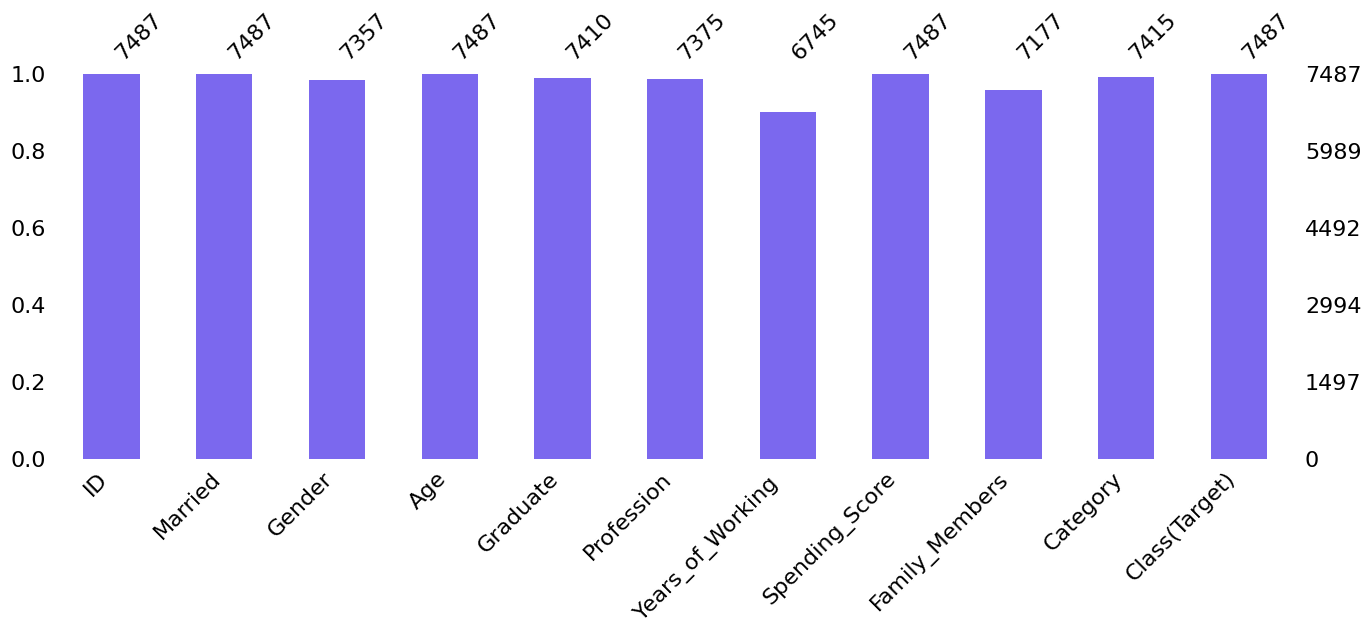

In [ ]:
msno.bar(data_raw, figsize = (16,5),color = "#7B68EE")
plt.show()

# Check duplicate

In [ ]:
ab = data_raw.duplicated()
ab = np.array(ab)
ab.flatten()


array([False, False, False, ..., False, False, False])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7487 entries, 0 to 7486
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 7487 non-null   int64  
 1   Married            7487 non-null   int64  
 2   Gender             7357 non-null   float64
 3   Age                7487 non-null   int64  
 4   Graduate           7410 non-null   float64
 5   Profession         7375 non-null   object 
 6   Years_of_Working   6745 non-null   float64
 7   Spending_Score     7487 non-null   object 
 8   Family_Members     7177 non-null   float64
 9   Category           7415 non-null   object 
 10  Class(Target)      7487 non-null   object 
dtypes: float64(4), int64(3), object(4)
memory usage: 643.5+ KB


In [ ]:
data_raw.describe().style.background_gradient(cmap = "summer")

In [57]:

drop_columns = ['ID']
# 输出删除后的DataFrame
# 使用dropna()方法删除包含NaN值的行
X = data_raw.dropna()
X = X.drop(drop_columns, axis=1)
X

Married  Gender  Age  Graduate     Profession  Years_of_Working   \
0           1     1.0   36       1.0         Artist                9.0   
1           0     1.0   49       1.0         Artist                1.0   
2           0     0.0   25       0.0      Homemaker                8.0   
3           1     0.0   77       1.0         Lawyer                0.0   
4           1     0.0   39       1.0  Entertainment                1.0   
...       ...     ...  ...       ...            ...                ...   
7482        0     1.0   21       0.0         Artist                1.0   
7483        0     1.0   37       1.0     Healthcare                1.0   
7484        0     0.0   66       0.0         Doctor                9.0   
7485        1     0.0   80       0.0         Artist                1.0   
7486        0     1.0   22       0.0     Healthcare                9.0   

     Spending_Score  Family_Members Category Class(Target)  
0               Low             2.0    Cat_6             B  
1               Low             1.0    Cat_6             D  
2               Low             1.0    Cat_3             A  
3              High             2.0    Cat_4             D  
4           Average             4.0    Cat_3             D  
...             ...             ...      ...           ...  
7482            Low             4.0    Cat_6             A  
7483            Low             2.0    Cat_6             C  
7484        Average             2.0    Cat_6             C  
7485            Low             2.0    Cat_6             C  
7486            Low             4.0    Cat_6             A  

[7487 rows x 10 columns]

In [58]:

drop_columns = ['ID']
# 输出删除后的DataFrame
# 使用dropna()方法删除包含NaN值的行
X_valid = validdata_raw.dropna()
X_valid = validdata_raw.drop(drop_columns, axis=1)
X_valid

Married  Gender  Age  Graduate  Profession  Years_of_Working   \
0           1     1.0   25       0.0  Healthcare                0.0   
1           1     1.0   27       0.0  Healthcare                1.0   
2           0     0.0   65       1.0      Lawyer                1.0   
3           1     0.0   47       1.0   Executive                3.0   
4           0     1.0   31       0.0      Doctor                1.0   
...       ...     ...  ...       ...         ...                ...   
2134        1     1.0   18       0.0  Healthcare                1.0   
2135        0     1.0   25       0.0  Healthcare                0.0   
2136        0     1.0   21       0.0  Healthcare                8.0   
2137        0     1.0   22       0.0      Doctor                1.0   
2138        0     0.0   40       0.0      Artist                1.0   

     Spending_Score  Family_Members Category  Class(Target)  
0               Low             5.0    Cat_6            NaN  
1               Low             3.0    Cat_6            NaN  
2               Low             2.0    Cat_3            NaN  
3              High             3.0    Cat_6            NaN  
4               Low             5.0    Cat_3            NaN  
...             ...             ...      ...            ...  
2134            Low             4.0    Cat_6            NaN  
2135            Low             4.0    Cat_2            NaN  
2136            Low             7.0    Cat_2            NaN  
2137            Low             5.0    Cat_6            NaN  
2138            Low             1.0    Cat_6            NaN  

[2139 rows x 10 columns]

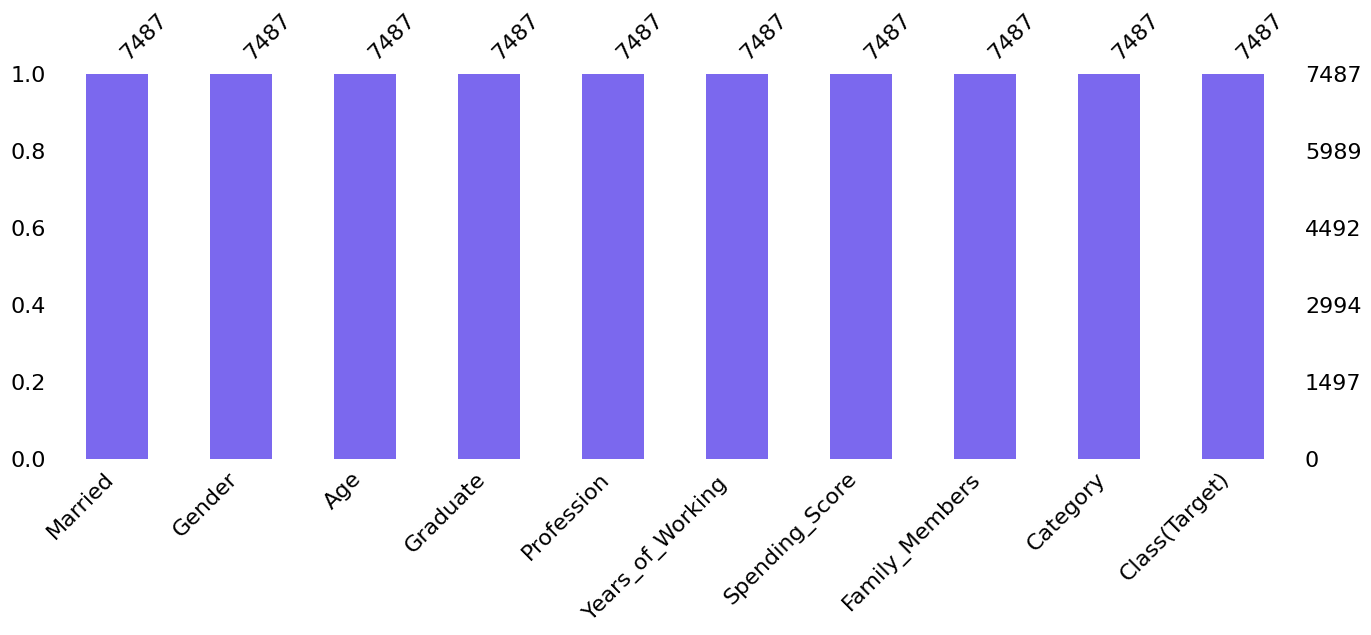

In [ ]:
msno.bar(X, figsize = (16,5),color = "#7B68EE")
plt.show()

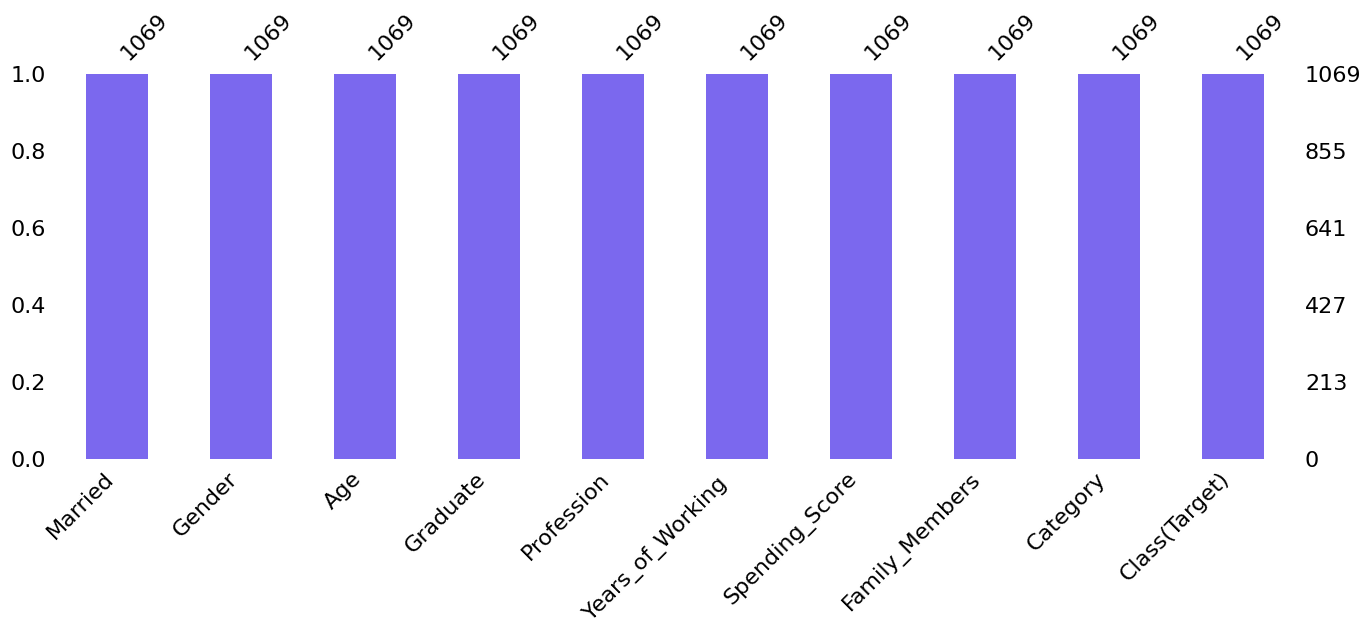

In [ ]:
msno.bar(X_valid, figsize = (16,5),color = "#7B68EE")
plt.show()

In [59]:


numeric_features=['Married', 'Gender', 'Age', 'Graduate','Years_of_Working ','Family_Members']
categorical_features=['Profession', 'Spending_Score', 'Category', 'Class(Target)']

In [ ]:
print(X["Family_Members"].value_counts())

Family_Members
2.0    1941
1.0    1200
3.0    1178
4.0    1076
5.0     500
6.0     178
7.0      66
8.0      38
9.0      35
Name: count, dtype: int64


In [ ]:
print(X["Years_of_Working "].value_counts())

Years_of_Working 
1.0     2053
0.0     2014
9.0      400
8.0      366
2.0      239
4.0      225
3.0      218
7.0      169
6.0      167
5.0      158
14.0      48
10.0      46
11.0      44
12.0      34
13.0      31
Name: count, dtype: int64


In [12]:
for column_name in X.columns:
    unique_values = len(X[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name, unique_values=unique_values))

Feature 'Married' has '2' unique values
Feature 'Gender' has '2' unique values
Feature 'Age' has '67' unique values
Feature 'Graduate' has '2' unique values
Feature 'Profession' has '9' unique values
Feature 'Years_of_Working ' has '15' unique values
Feature 'Spending_Score' has '3' unique values
Feature 'Family_Members' has '9' unique values
Feature 'Category' has '7' unique values
Feature 'Class(Target)' has '4' unique values


<ipython-input-30-ff28705373dc>:9: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



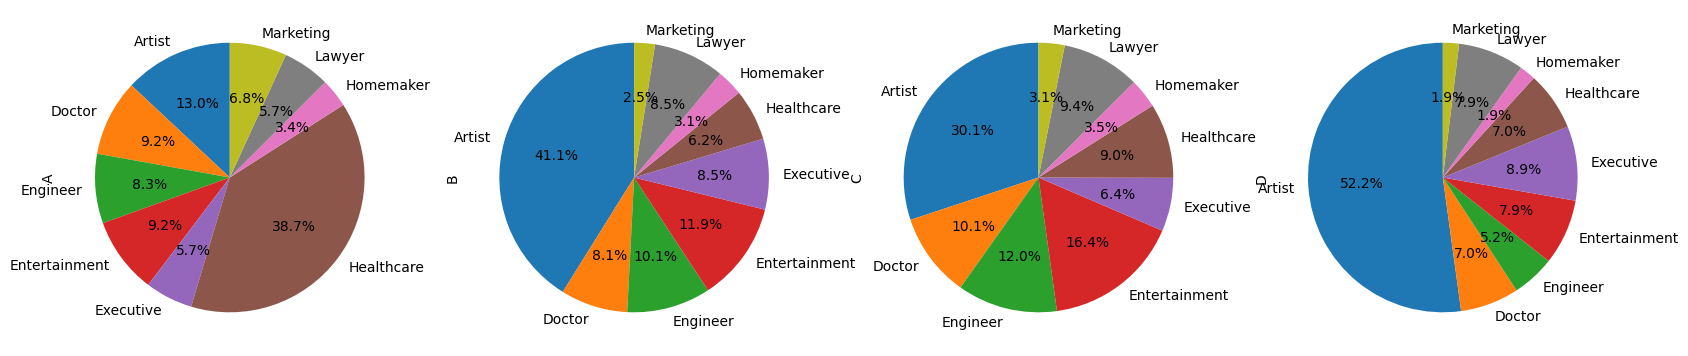

<ipython-input-30-ff28705373dc>:9: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



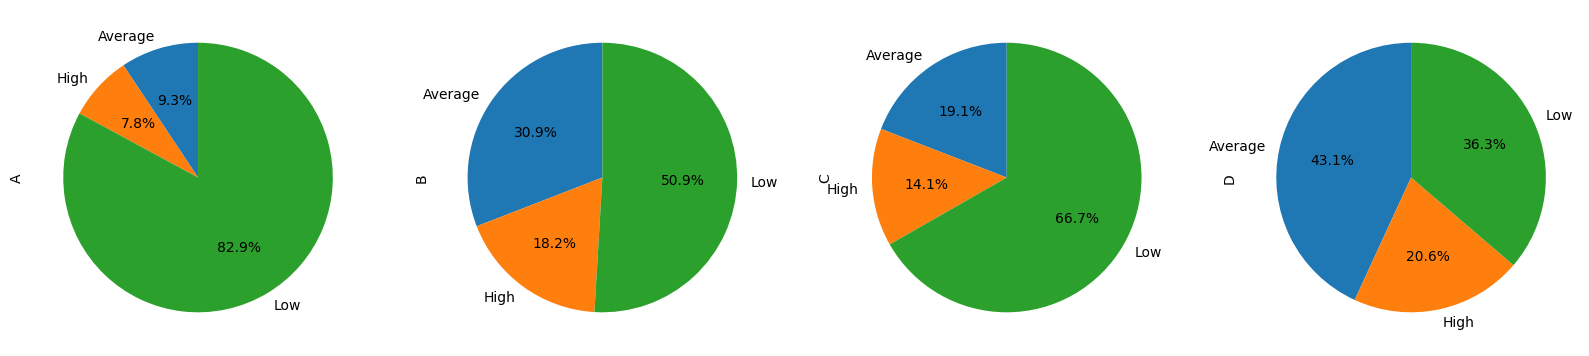

<ipython-input-30-ff28705373dc>:9: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



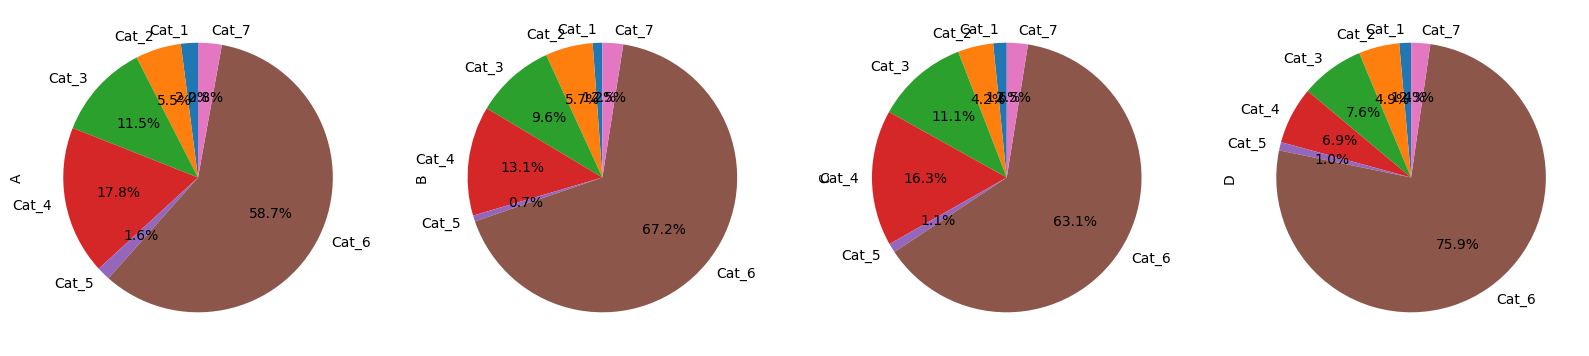

<ipython-input-30-ff28705373dc>:9: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



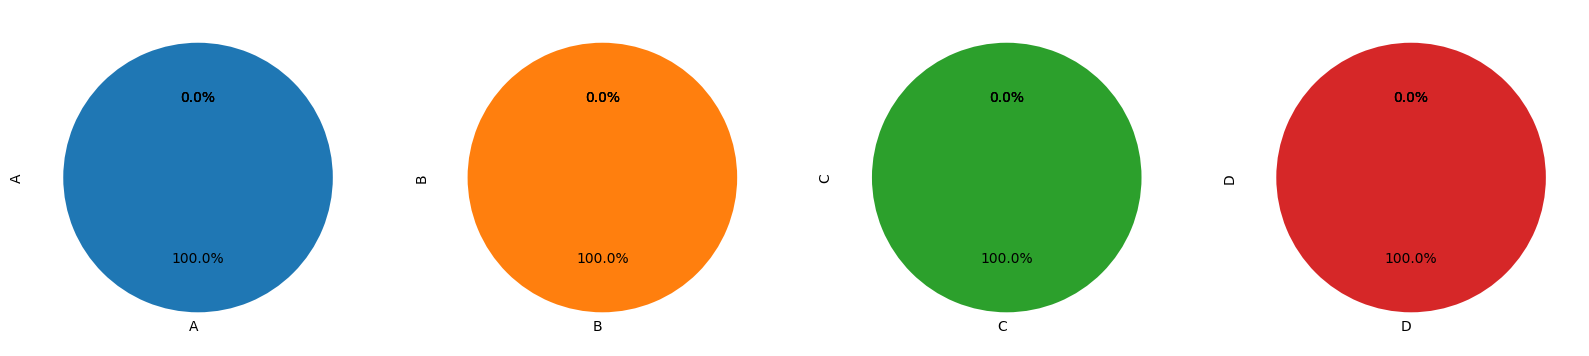

In [ ]:
for feature in categorical_features:
    # Create a new figure and axis for each pie chart
    fig, ax = plt.subplots(figsize=(20, 20))

    # Calculate the value counts for the feature segmented by 'Class(Target)'
    feature_counts = X.groupby([feature, 'Class(Target)']).size().unstack(fill_value=0)

    # Create a pie chart for the feature counts segmented by 'Class(Target)'
    feature_counts.plot(kind='pie', subplots=True, ax=ax, autopct='%1.1f%%', startangle=90, legend=False)

    # Set the title for the pie chart
    ax.set_title(f'Distribution of {feature} by Class(Target)')

    # Display the pie chart
    plt.show()

<ipython-input-30-dfb65a62b20f>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
<ipython-input-30-dfb65a62b20f>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
<ipython-input-30-dfb65a62b20f>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
<ipython-input-30-dfb65a62b20f>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)


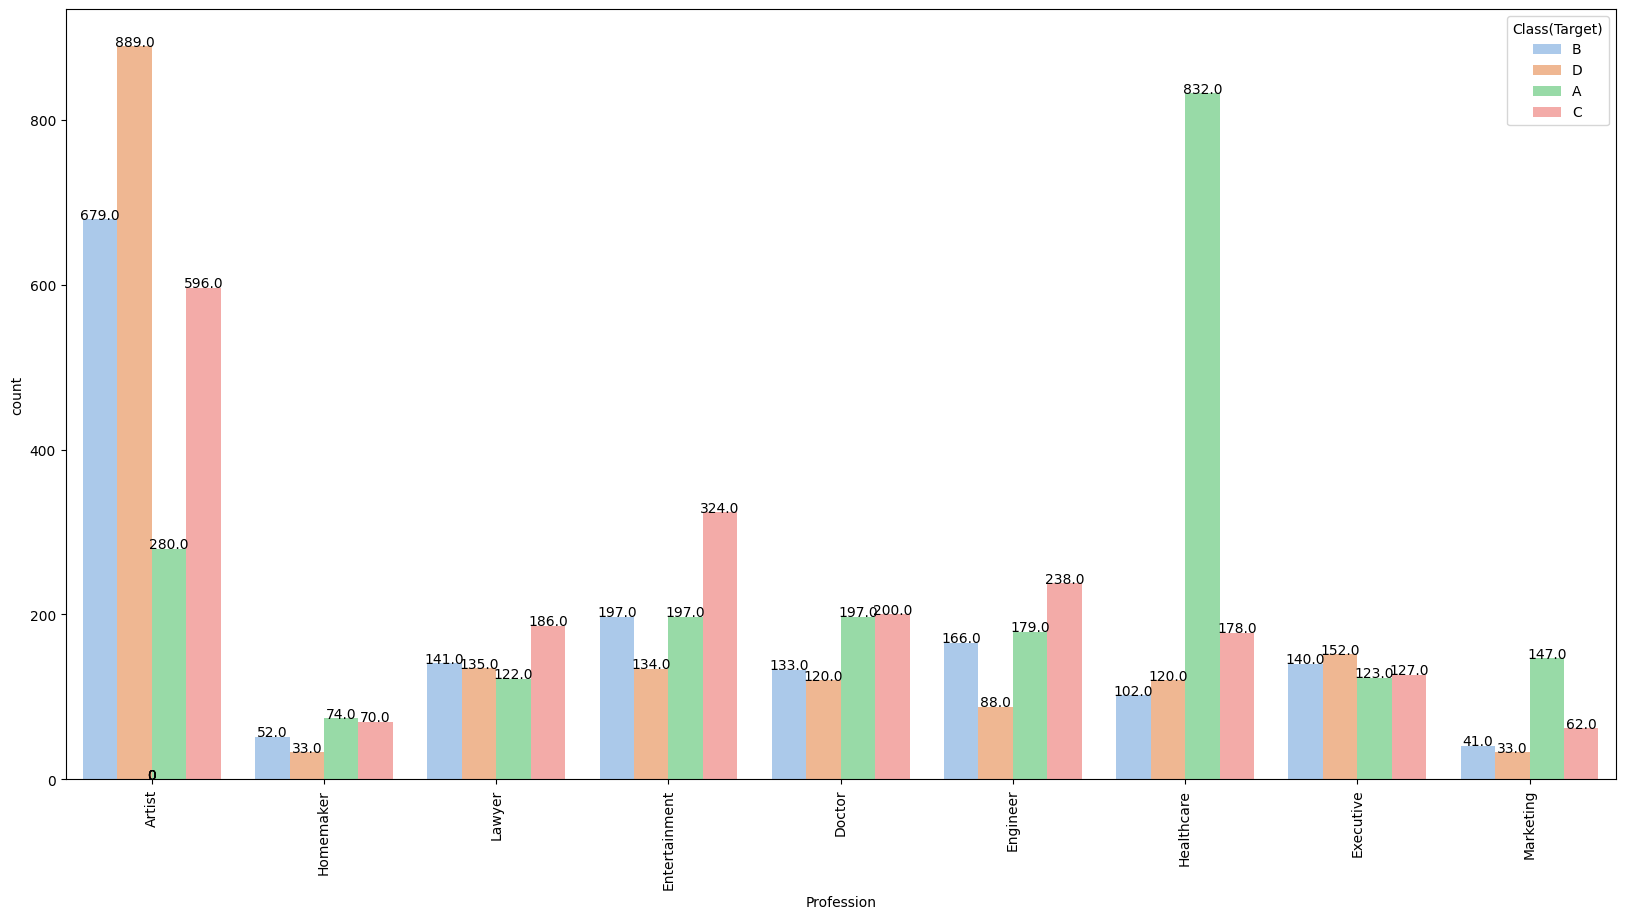

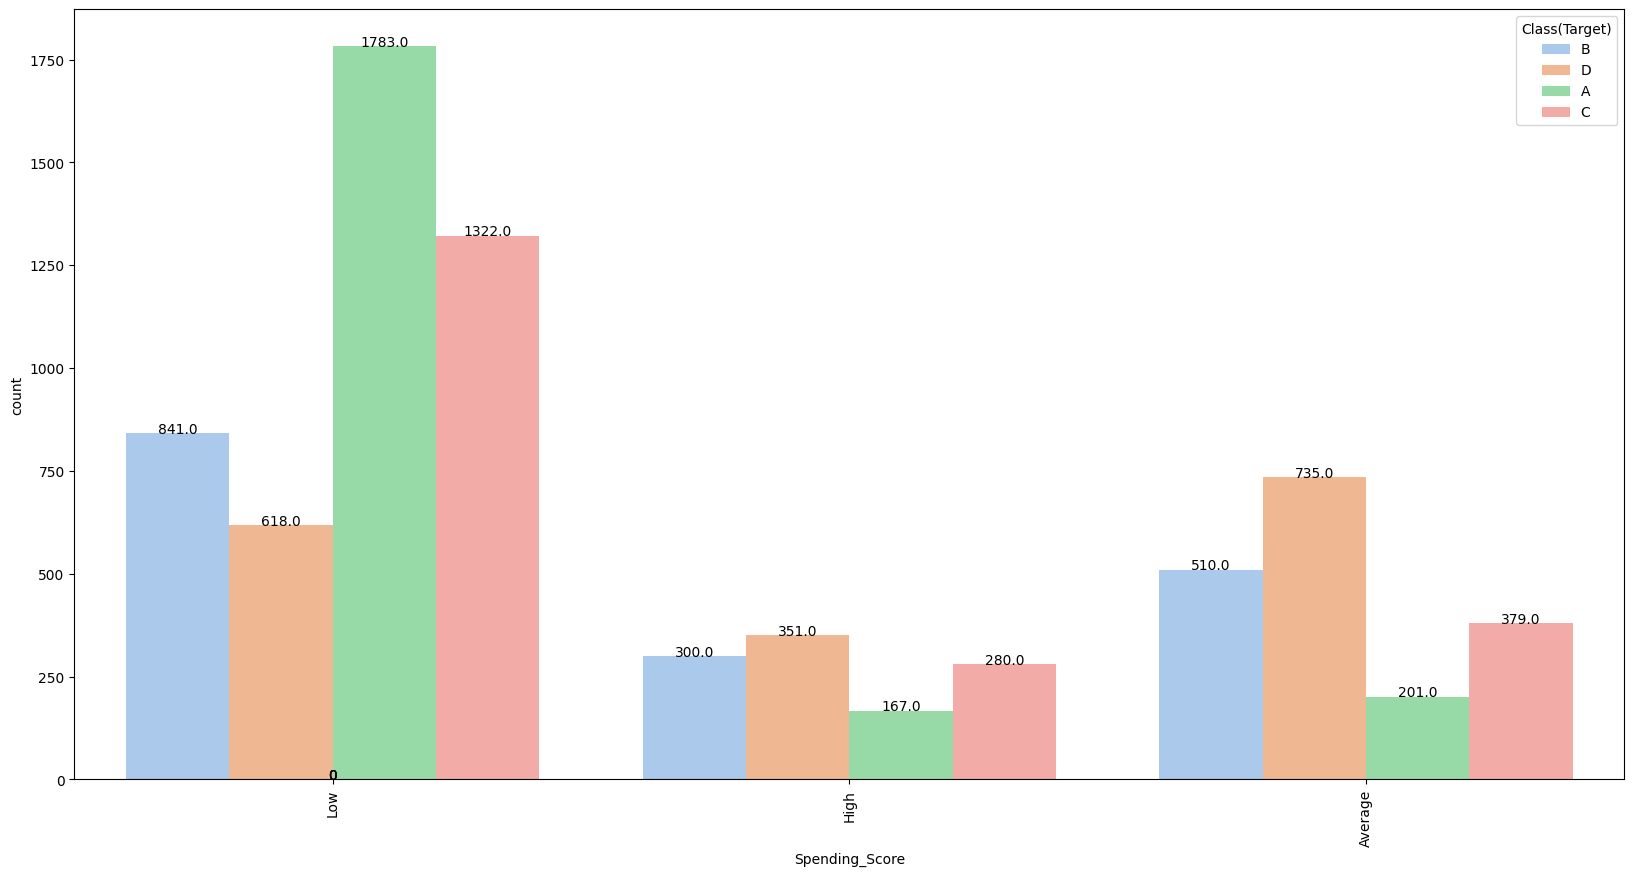

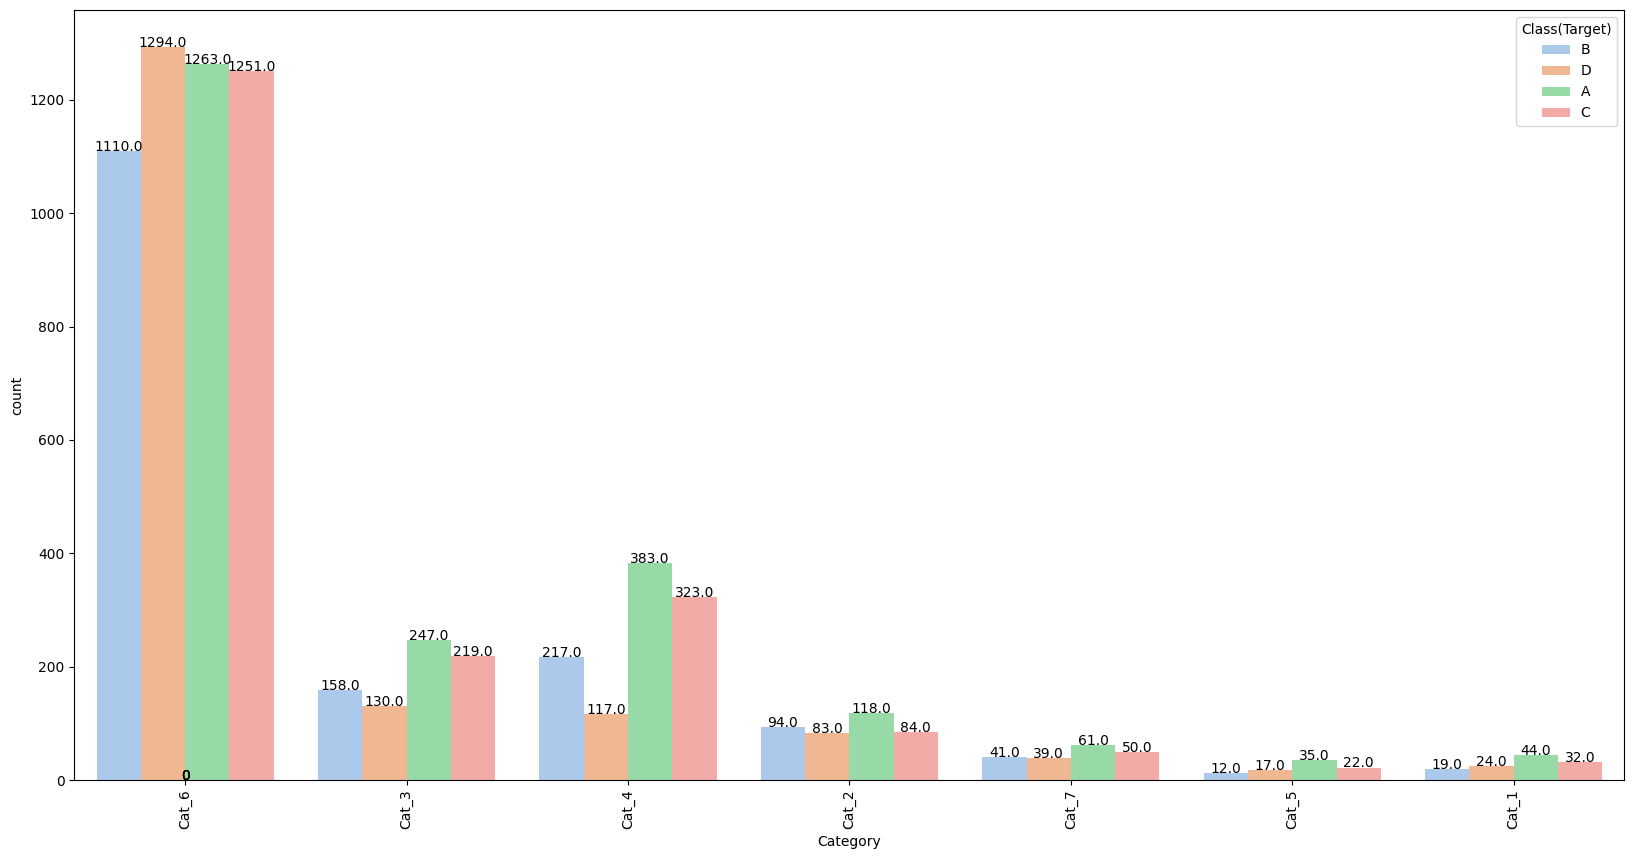

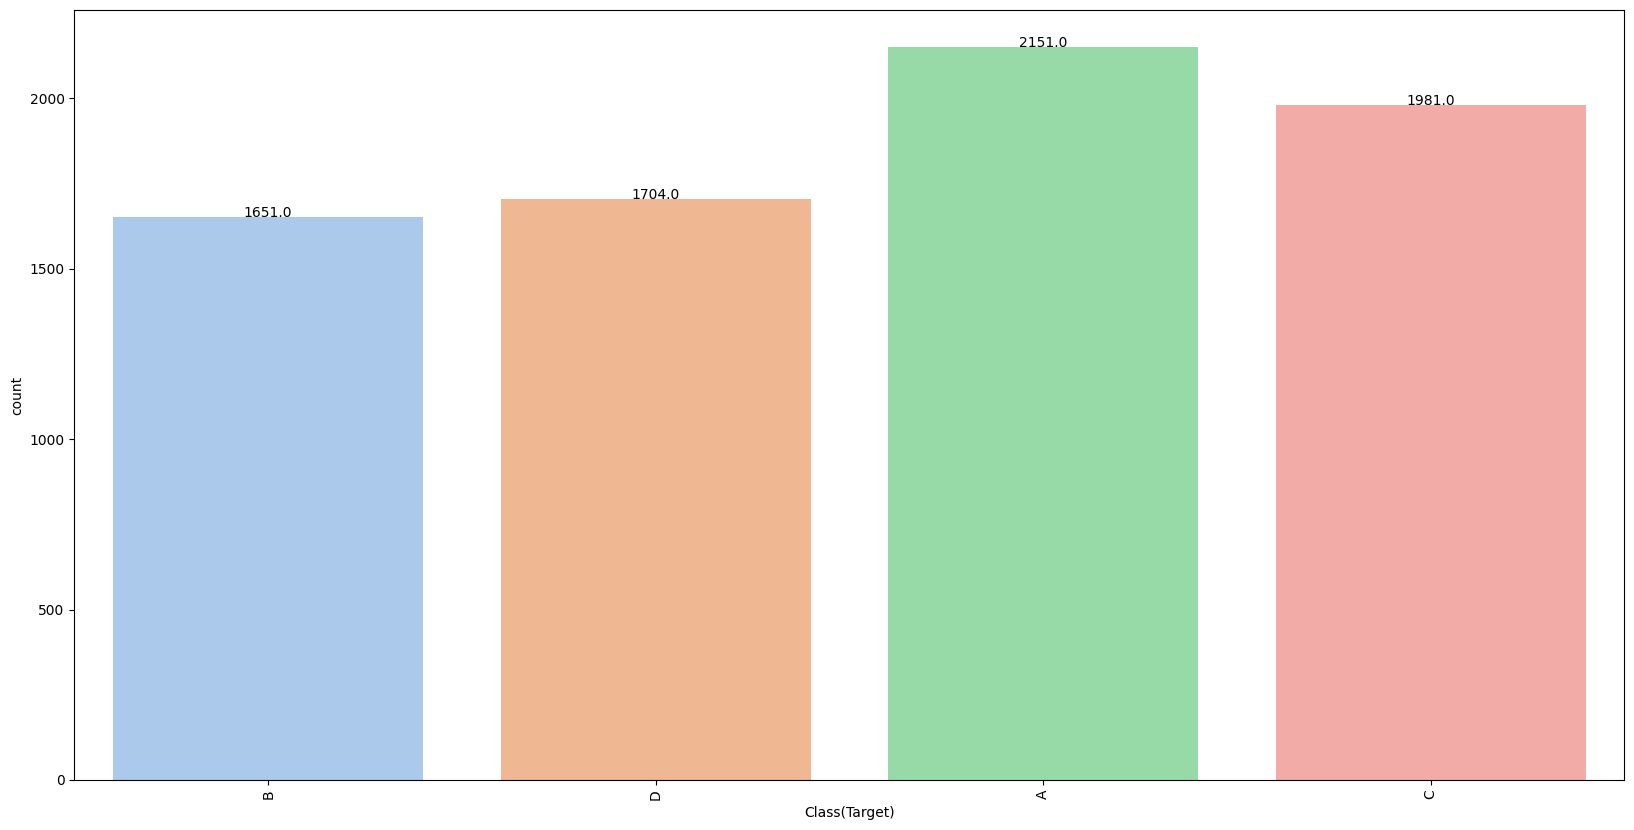

In [ ]:
for feature in categorical_features:
  fig, ax1 = plt.subplots(figsize=(20,10))
  graph = sns.countplot(ax=ax1,x = feature , data = X,hue='Class(Target)',palette='pastel')
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
  for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")


Text(0.5, 0.98, 'Visualizing continuous columns (raw dataset)')

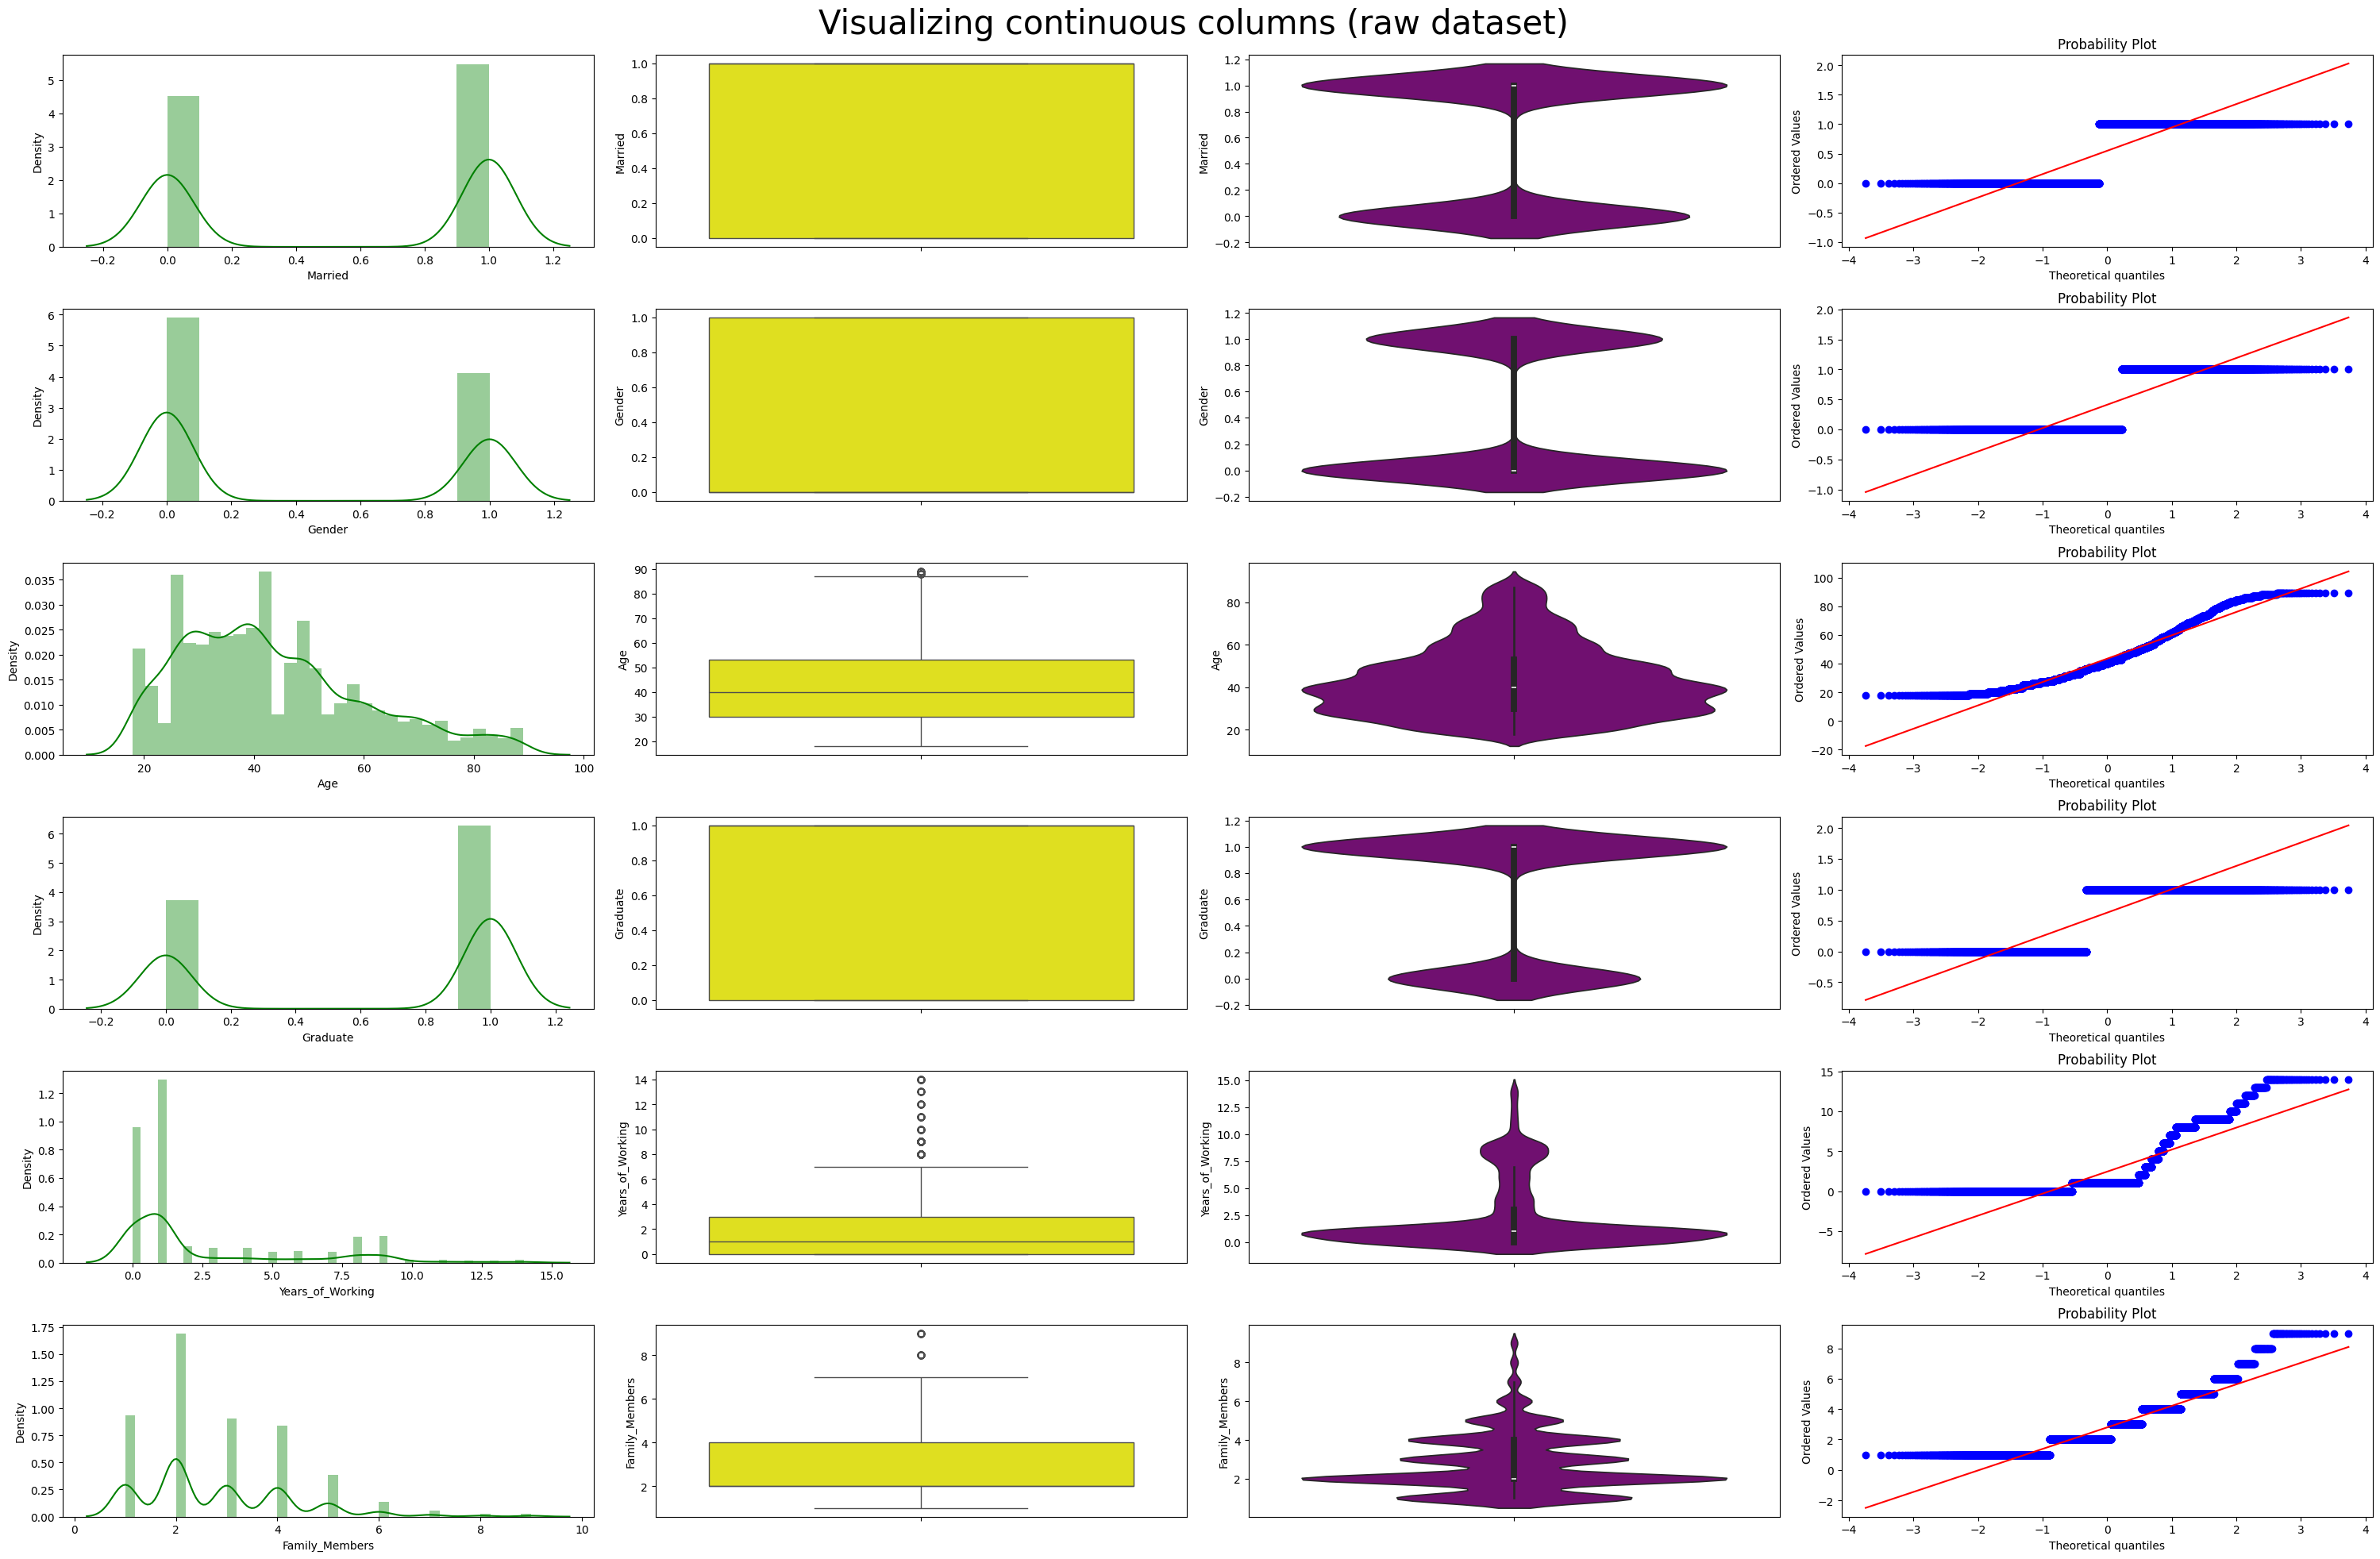

In [ ]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(len(numeric_features),4,figsize=(30,20))
for index,i in enumerate(numeric_features):
    sns.distplot(X[i],ax=ax[index,0],color='green')
    sns.boxplot(X[i],ax=ax[index,1],color='yellow')
    sns.violinplot(X[i],ax=ax[index,2],color='purple')
    stats.probplot(X[i],plot=ax[index,3])

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns (raw dataset)",fontsize=30)

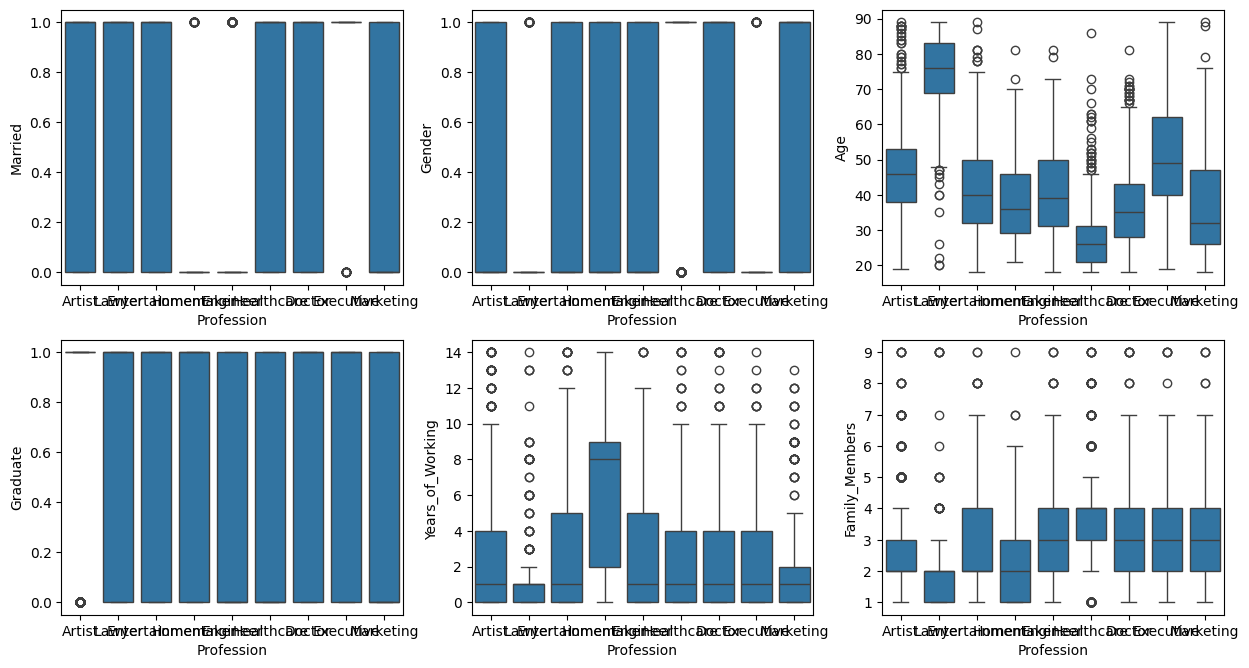

In [ ]:
i=1
plt.figure(figsize=(15,25))
for feature in numeric_features:
    plt.subplot(6,3,i)
    sns.boxplot(y=X[feature], x = X['Profession'])
    i+=1

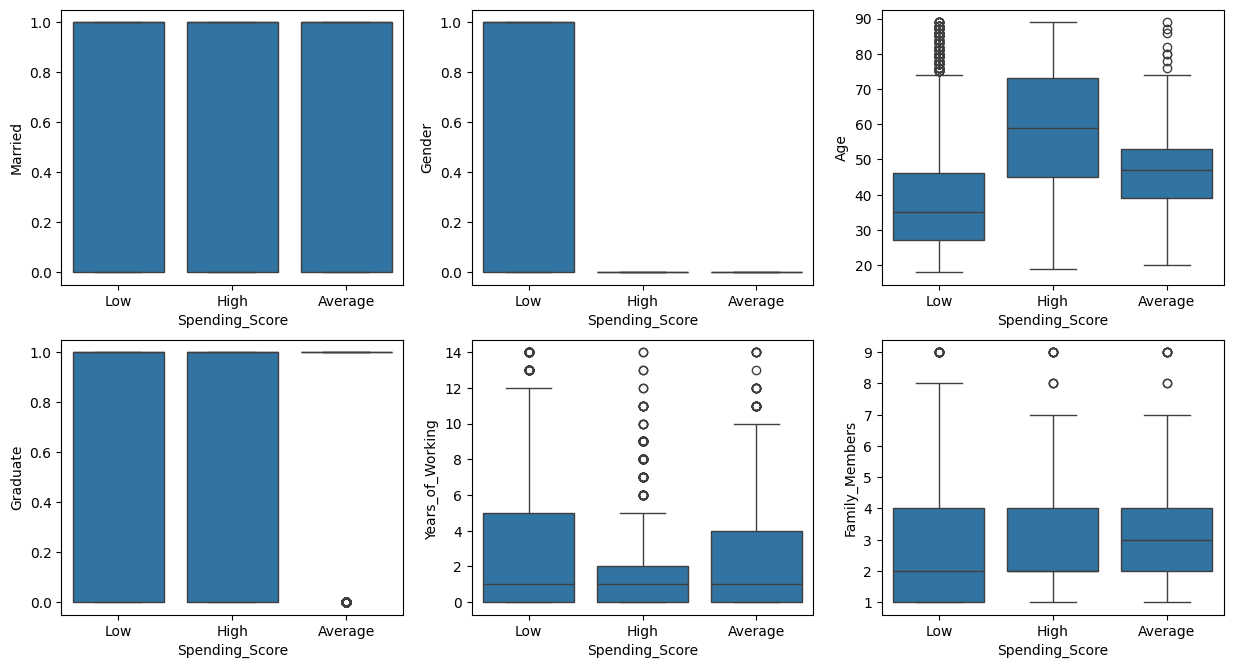

In [ ]:
i=1
plt.figure(figsize=(15,25))
for feature in numeric_features:
    plt.subplot(6,3,i)
    sns.boxplot(y=X[feature], x = X['Spending_Score'])
    i+=1

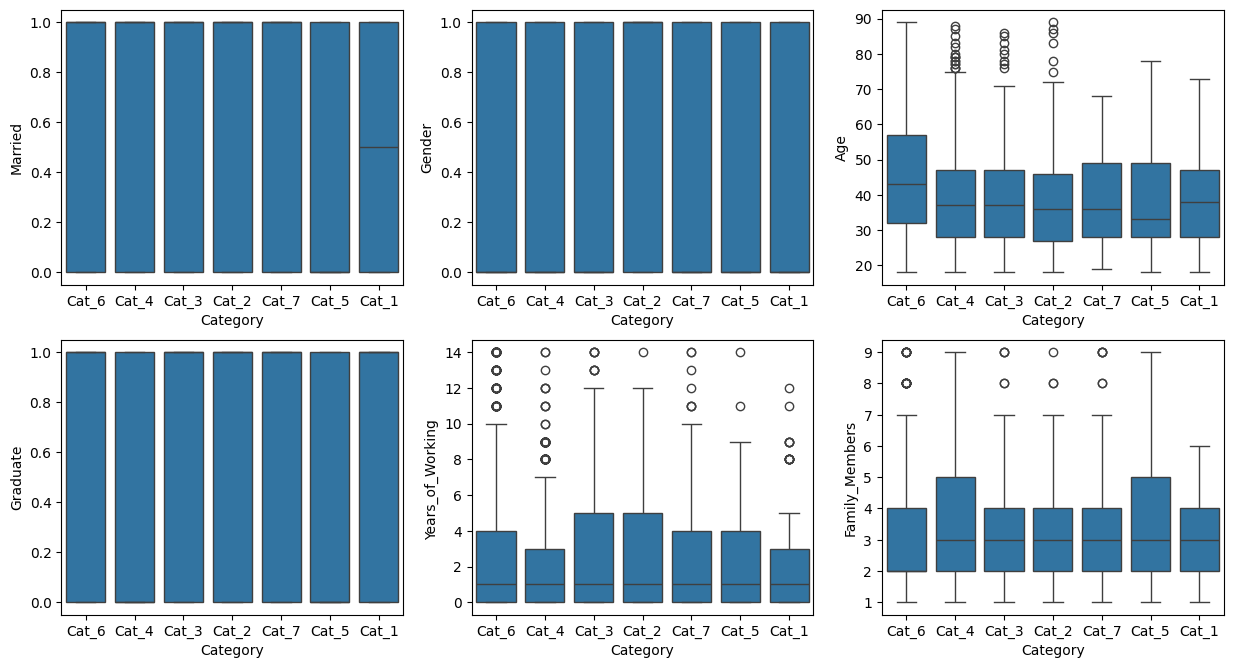

In [ ]:
i=1
plt.figure(figsize=(15,25))
for feature in numeric_features:
    plt.subplot(6,3,i)
    sns.boxplot(y=X[feature], x = X['Category'])
    i+=1

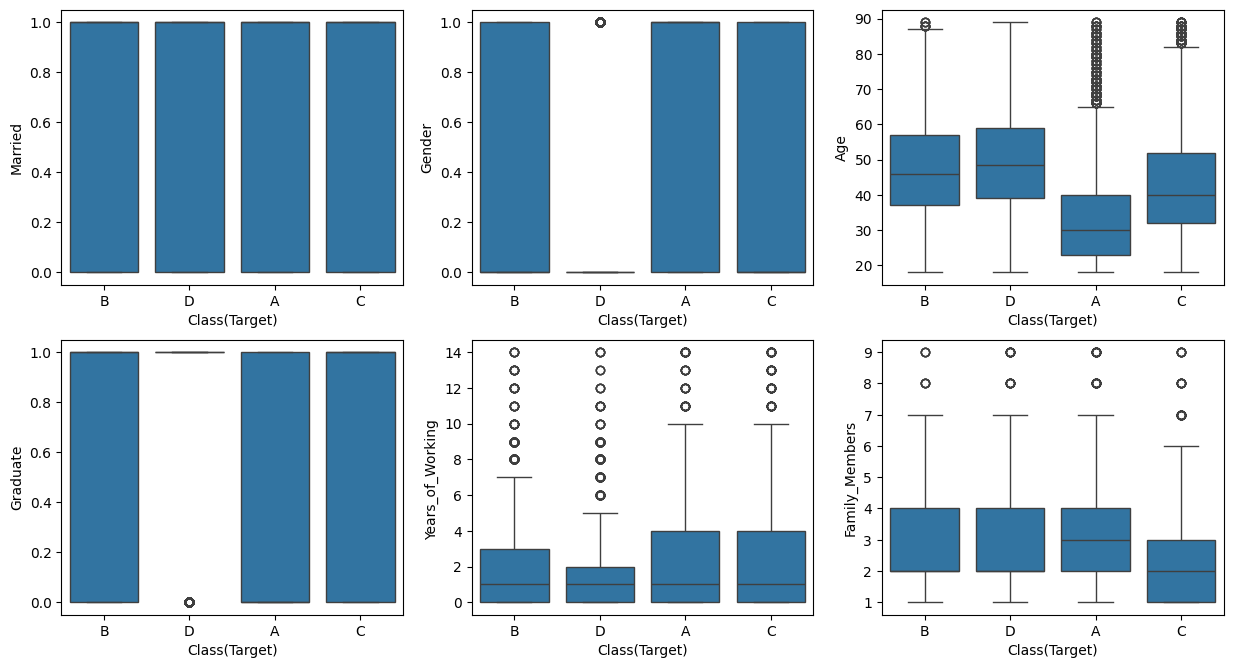

In [ ]:
i=1
plt.figure(figsize=(15,25))
for feature in numeric_features:
    plt.subplot(6,3,i)
    sns.boxplot(y=X[feature], x = X['Class(Target)'])
    i+=1

<a id="title-four"></a>
<h1 style='background:#4682B4; border:2; border-radius: 10px; color:black'><center>STATISTICAL TESTS</center></h1>

In [60]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
#enc = OrdinalEncoder()
#enc.fit(X[categorical_features])
#X[categorical_features] = enc.transform(X[categorical_features])
#################################


In [15]:
X

Married  Gender  Age  Graduate     Profession  Years_of_Working   \
0           1     1.0   36       1.0         Artist                9.0   
1           0     1.0   49       1.0         Artist                1.0   
2           0     0.0   25       0.0      Homemaker                8.0   
3           1     0.0   77       1.0         Lawyer                0.0   
4           1     0.0   39       1.0  Entertainment                1.0   
...       ...     ...  ...       ...            ...                ...   
7482        0     1.0   21       0.0         Artist                1.0   
7483        0     1.0   37       1.0     Healthcare                1.0   
7484        0     0.0   66       0.0         Doctor                9.0   
7485        1     0.0   80       0.0         Artist                1.0   
7486        0     1.0   22       0.0     Healthcare                9.0   

     Spending_Score  Family_Members Category Class(Target)  
0               Low             2.0    Cat_6             B  
1               Low             1.0    Cat_6             D  
2               Low             1.0    Cat_3             A  
3              High             2.0    Cat_4             D  
4           Average             4.0    Cat_3             D  
...             ...             ...      ...           ...  
7482            Low             4.0    Cat_6             A  
7483            Low             2.0    Cat_6             C  
7484        Average             2.0    Cat_6             C  
7485            Low             2.0    Cat_6             C  
7486            Low             4.0    Cat_6             A  

[7487 rows x 10 columns]

In [61]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
#X[['Profession'],['Spending_Score'],['Category'],['Class(Target)']]=encoder.fit_transform(X[['Profession'],['Spending_Score'],['Category'],['Class(Target)']])
categorical_features=['Class(Target)']
enc = OrdinalEncoder()
enc.fit(X[categorical_features])
X[categorical_features] = enc.transform(X[categorical_features])








X_1 = X.join(pd.get_dummies(X.Profession))
X_1 = X_1.join(pd.get_dummies(X.Spending_Score))
X_1 = X_1.join(pd.get_dummies(X.Category))

drop_columns = ['Profession','Spending_Score','Category']
# 输出删除后的DataFrame
# 使用dropna()方法删除包含NaN值的行
X_1 = X_1.drop(drop_columns, axis=1)
X_1 = X_1 + 0

age_feature = X_1[['Age']]
scaler = StandardScaler()
X_1['Age'] = scaler.fit_transform(age_feature)
#X_1 = X_1.drop('Age', axis=1)

X_1
##################################################Test
newdrop_columns = ['Gender','Healthcare','Low']
X_1 = X_1.drop(newdrop_columns, axis=1)
X_1

Married       Age  Graduate  Years_of_Working   Family_Members  \
0           1 -0.443071       1.0                9.0             2.0   
1           0  0.335420       1.0                1.0             1.0   
2           0 -1.101794       0.0                8.0             1.0   
3           1  2.012171       1.0                0.0             2.0   
4           1 -0.263419       1.0                1.0             4.0   
...       ...       ...       ...                ...             ...   
7482        0 -1.341330       0.0                1.0             4.0   
7483        0 -0.383187       1.0                1.0             2.0   
7484        0  1.353448       0.0                9.0             2.0   
7485        1  2.191823       0.0                1.0             2.0   
7486        0 -1.281446       0.0                9.0             4.0   

      Class(Target)  Artist  Doctor  Engineer  Entertainment  ...  Marketing  \
0               1.0       1       0         0              0  ...          0   
1               3.0       1       0         0              0  ...          0   
2               0.0       0       0         0              0  ...          0   
3               3.0       0       0         0              0  ...          0   
4               3.0       0       0         0              1  ...          0   
...             ...     ...     ...       ...            ...  ...        ...   
7482            0.0       1       0         0              0  ...          0   
7483            2.0       0       0         0              0  ...          0   
7484            2.0       0       1         0              0  ...          0   
7485            2.0       1       0         0              0  ...          0   
7486            0.0       0       0         0              0  ...          0   

      Average  High  Cat_1  Cat_2  Cat_3  Cat_4  Cat_5  Cat_6  Cat_7  
0           0     0      0      0      0      0      0      1      0  
1           0     0      0      0      0      0      0      1      0  
2           0     0      0      0      1      0      0      0      0  
3           0     1      0      0      0      1      0      0      0  
4           1     0      0      0      1      0      0      0      0  
...       ...   ...    ...    ...    ...    ...    ...    ...    ...  
7482        0     0      0      0      0      0      0      1      0  
7483        0     0      0      0      0      0      0      1      0  
7484        1     0      0      0      0      0      0      1      0  
7485        0     0      0      0      0      0      0      1      0  
7486        0     0      0      0      0      0      0      1      0  

[7487 rows x 23 columns]

In [62]:
X = X_1

Valid

In [63]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
#X[['Profession'],['Spending_Score'],['Category'],['Class(Target)']]=encoder.fit_transform(X[['Profession'],['Spending_Score'],['Category'],['Class(Target)']])
categorical_features=['Class(Target)']
enc = OrdinalEncoder()
enc.fit(X_valid[categorical_features])
X_valid[categorical_features] = enc.transform(X_valid[categorical_features])








X_2 = X_valid.join(pd.get_dummies(X_valid.Profession))
X_2 = X_2.join(pd.get_dummies(X_valid.Spending_Score))
X_2 = X_2.join(pd.get_dummies(X_valid.Category))

drop_columns = ['Profession','Spending_Score','Category']
# 输出删除后的DataFrame
# 使用dropna()方法删除包含NaN值的行
X_2 = X_2.drop(drop_columns, axis=1)
X_2 = X_2 + 0

age_feature = X_2[['Age']]
scaler = StandardScaler()
X_2['Age'] = scaler.fit_transform(age_feature)
#X_1 = X_1.drop('Age', axis=1)

X_2



##################################################Test
newdrop_columns = ['Gender','Healthcare','Low']
X_2 = X_2.drop(newdrop_columns, axis=1)
X_2

Married       Age  Graduate  Years_of_Working   Family_Members  \
0           1 -1.103270       0.0                0.0             5.0   
1           1 -0.986104       0.0                1.0             3.0   
2           0  1.240045       1.0                1.0             2.0   
3           1  0.185554       1.0                3.0             3.0   
4           0 -0.751773       0.0                1.0             5.0   
...       ...       ...       ...                ...             ...   
2134        1 -1.513350       0.0                1.0             4.0   
2135        0 -1.103270       0.0                0.0             4.0   
2136        0 -1.337601       0.0                8.0             7.0   
2137        0 -1.279019       0.0                1.0             5.0   
2138        0 -0.224527       0.0                1.0             1.0   

      Class(Target)  Artist  Doctor  Engineer  Entertainment  ...  Marketing  \
0               NaN       0       0         0              0  ...          0   
1               NaN       0       0         0              0  ...          0   
2               NaN       0       0         0              0  ...          0   
3               NaN       0       0         0              0  ...          0   
4               NaN       0       1         0              0  ...          0   
...             ...     ...     ...       ...            ...  ...        ...   
2134            NaN       0       0         0              0  ...          0   
2135            NaN       0       0         0              0  ...          0   
2136            NaN       0       0         0              0  ...          0   
2137            NaN       0       1         0              0  ...          0   
2138            NaN       1       0         0              0  ...          0   

      Average  High  Cat_1  Cat_2  Cat_3  Cat_4  Cat_5  Cat_6  Cat_7  
0           0     0      0      0      0      0      0      1      0  
1           0     0      0      0      0      0      0      1      0  
2           0     0      0      0      1      0      0      0      0  
3           0     1      0      0      0      0      0      1      0  
4           0     0      0      0      1      0      0      0      0  
...       ...   ...    ...    ...    ...    ...    ...    ...    ...  
2134        0     0      0      0      0      0      0      1      0  
2135        0     0      0      1      0      0      0      0      0  
2136        0     0      0      1      0      0      0      0      0  
2137        0     0      0      0      0      0      0      1      0  
2138        0     0      0      0      0      0      0      1      0  

[2139 rows x 23 columns]

In [64]:
X_valid = X_2

In [ ]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
# normality test
for feature in numeric_features:
	stat, p = shapiro(X[feature])
	print('Statistics=%.3f, p=%.3f' % (stat, p))
	# interpret
	alpha = 0.05
	if p > alpha:
		print('Sample looks Gaussian (fail to reject H0)')
	else:
		print('Sample does not look Gaussian (reject H0)')

Statistics=0.633, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.625, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.950, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.613, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.722, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.884, p=0.000
Sample does not look Gaussian (reject H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
from scipy.stats import chi2_contingency
# defining the table
for feature in categorical_features:
  stat, p, dof, expected = chi2_contingency(pd.crosstab(X[feature],X['Class(Target)']))
# interpret p-value
  alpha = 0.05
  print ( "p value is " + str (p))
  if p<=alpha:
    print ( 'Dependent (reject H0)' )
  else :
    print ( 'Independent (H0 holds true)' )

p value is 0.0
Dependent (reject H0)
p value is 1.0813407381583035e-212
Dependent (reject H0)
p value is 1.4672266395960598e-27
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)


Class(Target)        1.000000
Age                  0.288567
Graduate             0.262545
Artist               0.261574
Average              0.236560
High                 0.113720
Cat_6                0.111873
Lawyer               0.035914
Executive            0.033590
Entertainment        0.009879
Cat_7               -0.011706
Cat_1               -0.014626
Doctor              -0.016010
Cat_2               -0.017217
Cat_5               -0.017974
Engineer            -0.022855
Homemaker           -0.025441
Married             -0.033251
Cat_3               -0.036980
Years_of_Working    -0.049446
Family_Members      -0.076423
Marketing           -0.087691
Cat_4               -0.094314
Gender              -0.290547
Low                 -0.290660
Healthcare          -0.302033
Name: Class(Target), dtype: float64 



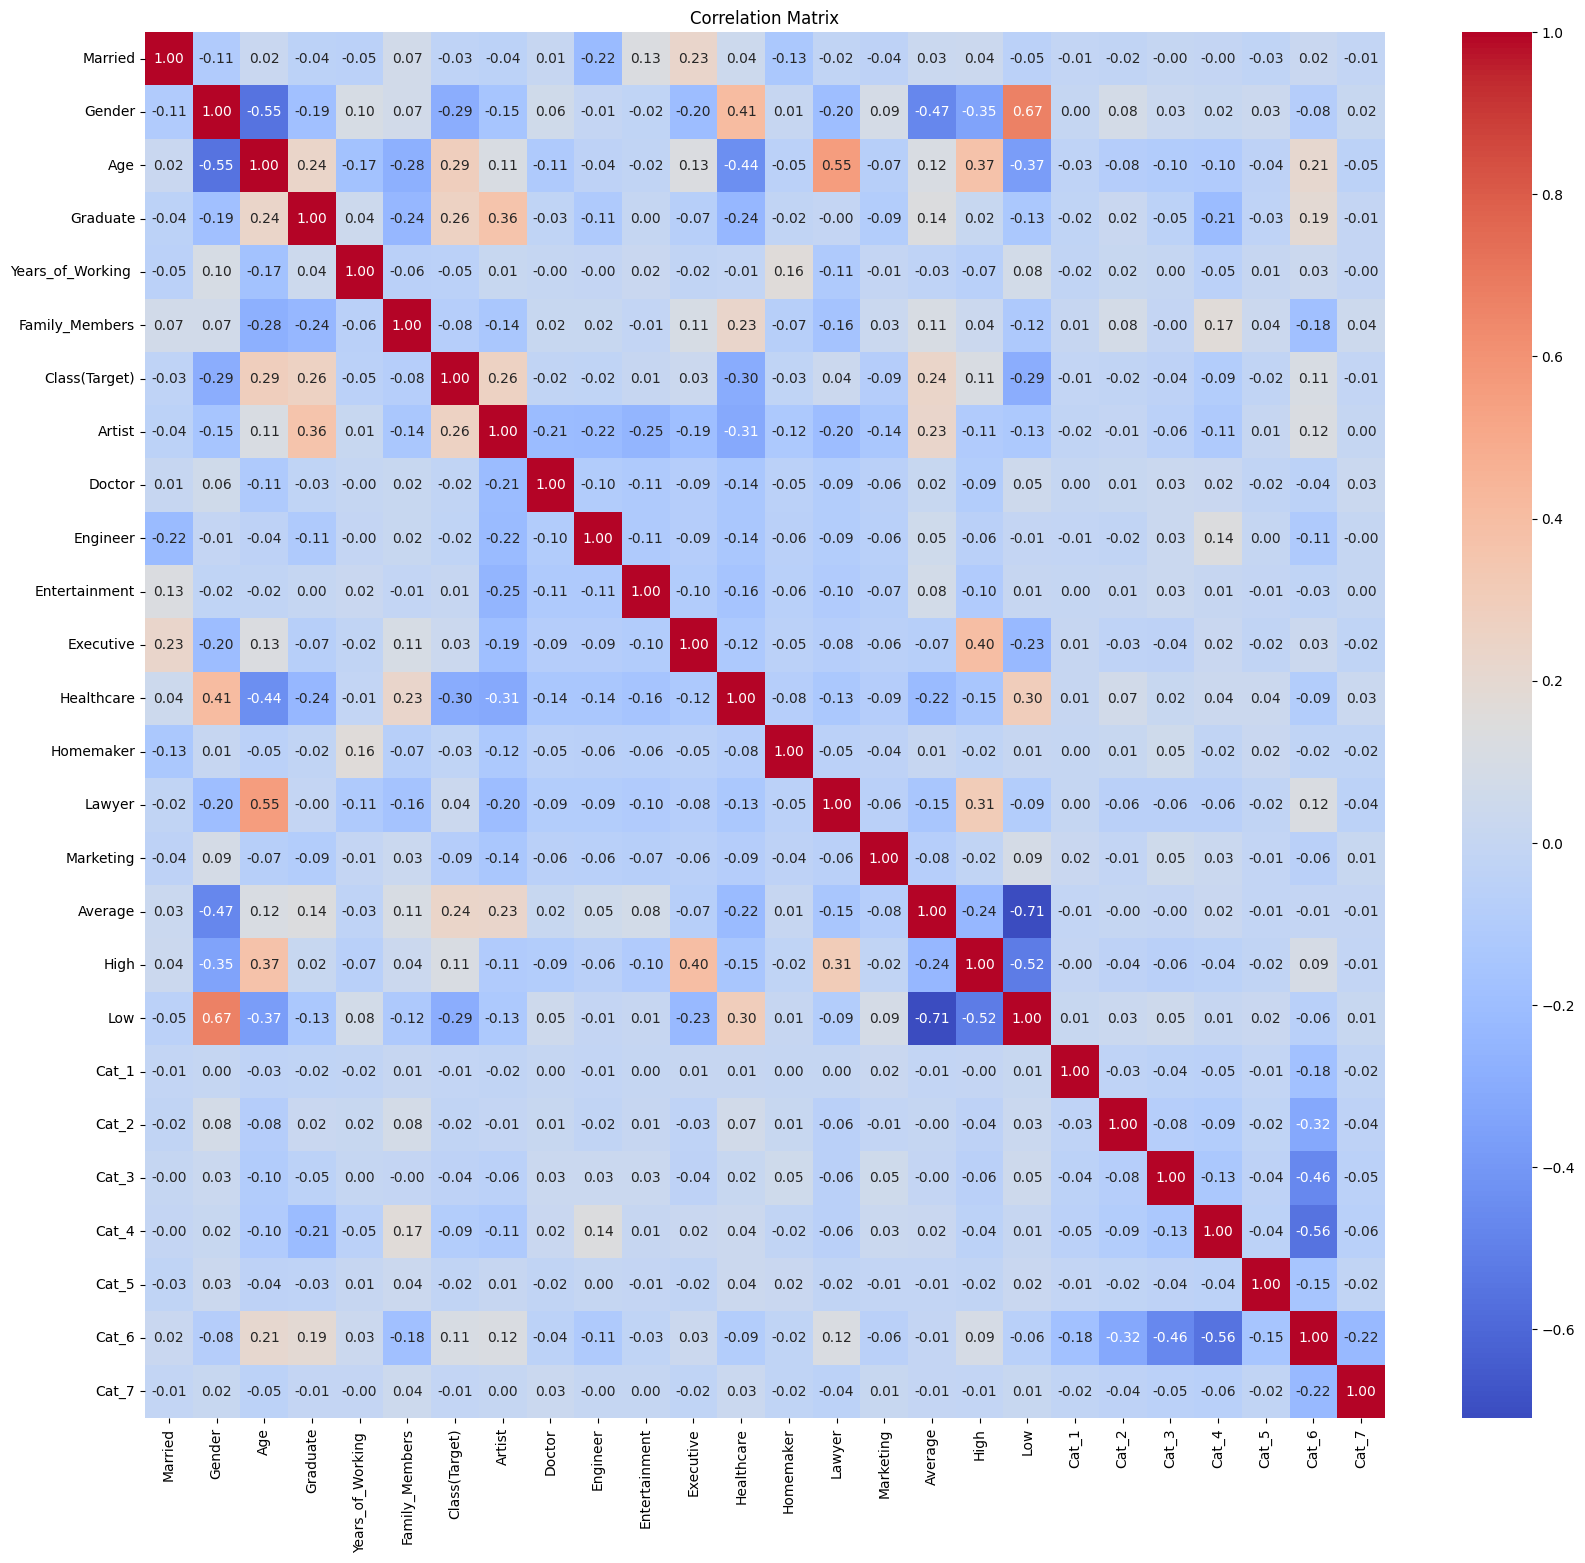

In [ ]:
# Calculate the correlation matrix
correlation = X.corr()

# Sort and print the correlation with the target variable
print(correlation['Class(Target)'].sort_values(ascending=False), '\n')

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 18))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
correlation = X.corr()
print(correlation['Class(Target)'].sort_values(ascending = False),'\n')

Class(Target)        1.000000
Age                  0.288567
Graduate             0.262545
Artist               0.261574
Average              0.236560
High                 0.113720
Cat_6                0.111873
Lawyer               0.035914
Executive            0.033590
Entertainment        0.009879
Cat_7               -0.011706
Cat_1               -0.014626
Doctor              -0.016010
Cat_2               -0.017217
Cat_5               -0.017974
Engineer            -0.022855
Homemaker           -0.025441
Married             -0.033251
Cat_3               -0.036980
Years_of_Working    -0.049446
Family_Members      -0.076423
Marketing           -0.087691
Cat_4               -0.094314
Gender              -0.290547
Low                 -0.290660
Healthcare          -0.302033
Name: Class(Target), dtype: float64 



In [ ]:
k= 10
cols = correlation.nlargest(k,'Class(Target)')['Class(Target)'].index
print(cols)
cm = np.corrcoef(X[cols].values.T)
mask = np.triu(np.ones_like(X.corr()))
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm,mask=mask, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

NameError: name 'correlation' is not defined

<a id="title-five"></a>
<h1 style='background:#4682B4; border:2; border-radius: 10px; color:black'><center>MACHINE LEARNING</center></h1>

In [65]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [66]:
from sklearn.preprocessing import RobustScaler

# Create an instance of the RobustScaler
scaler = RobustScaler()
columns_to_scale = ['Age', 'Family_Members', 'Years_of_Working ']
# Fit and transform the 'Age' feature using the RobustScaler
X_1[columns_to_scale] = scaler.fit_transform(X_1[columns_to_scale])

from sklearn.preprocessing import MinMaxScaler

# Create an instance of the MinMaxScaler
scaler = MinMaxScaler()

columns_to_scale = ['Age', 'Family_Members', 'Years_of_Working ']

# Fit and transform the selected columns using the MinMaxScaler
X_1[columns_to_scale] = scaler.fit_transform(X_1[columns_to_scale])

# View the modified DataFrame
X_1

Married       Age  Graduate  Years_of_Working   Family_Members  \
0           1  0.253521       1.0           0.642857           0.125   
1           0  0.436620       1.0           0.071429           0.000   
2           0  0.098592       0.0           0.571429           0.000   
3           1  0.830986       1.0           0.000000           0.125   
4           1  0.295775       1.0           0.071429           0.375   
...       ...       ...       ...                ...             ...   
7482        0  0.042254       0.0           0.071429           0.375   
7483        0  0.267606       1.0           0.071429           0.125   
7484        0  0.676056       0.0           0.642857           0.125   
7485        1  0.873239       0.0           0.071429           0.125   
7486        0  0.056338       0.0           0.642857           0.375   

      Class(Target)  Artist  Doctor  Engineer  Entertainment  ...  Marketing  \
0               1.0       1       0         0              0  ...          0   
1               3.0       1       0         0              0  ...          0   
2               0.0       0       0         0              0  ...          0   
3               3.0       0       0         0              0  ...          0   
4               3.0       0       0         0              1  ...          0   
...             ...     ...     ...       ...            ...  ...        ...   
7482            0.0       1       0         0              0  ...          0   
7483            2.0       0       0         0              0  ...          0   
7484            2.0       0       1         0              0  ...          0   
7485            2.0       1       0         0              0  ...          0   
7486            0.0       0       0         0              0  ...          0   

      Average  High  Cat_1  Cat_2  Cat_3  Cat_4  Cat_5  Cat_6  Cat_7  
0           0     0      0      0      0      0      0      1      0  
1           0     0      0      0      0      0      0      1      0  
2           0     0      0      0      1      0      0      0      0  
3           0     1      0      0      0      1      0      0      0  
4           1     0      0      0      1      0      0      0      0  
...       ...   ...    ...    ...    ...    ...    ...    ...    ...  
7482        0     0      0      0      0      0      0      1      0  
7483        0     0      0      0      0      0      0      1      0  
7484        1     0      0      0      0      0      0      1      0  
7485        0     0      0      0      0      0      0      1      0  
7486        0     0      0      0      0      0      0      1      0  

[7487 rows x 23 columns]

In [67]:
from sklearn.preprocessing import RobustScaler

# Create an instance of the RobustScaler
scaler = RobustScaler()
columns_to_scale = ['Age', 'Family_Members', 'Years_of_Working ']
# Fit and transform the 'Age' feature using the RobustScaler
X_2[columns_to_scale] = scaler.fit_transform(X_2[columns_to_scale])

from sklearn.preprocessing import MinMaxScaler

# Create an instance of the MinMaxScaler
scaler = MinMaxScaler()

columns_to_scale = ['Age', 'Family_Members', 'Years_of_Working ']

# Fit and transform the selected columns using the MinMaxScaler
X_2[columns_to_scale] = scaler.fit_transform(X_2[columns_to_scale])

# View the modified DataFrame
X_2

Married       Age  Graduate  Years_of_Working   Family_Members  \
0           1  0.098592       0.0           0.000000           0.500   
1           1  0.126761       0.0           0.071429           0.250   
2           0  0.661972       1.0           0.071429           0.125   
3           1  0.408451       1.0           0.214286           0.250   
4           0  0.183099       0.0           0.071429           0.500   
...       ...       ...       ...                ...             ...   
2134        1  0.000000       0.0           0.071429           0.375   
2135        0  0.098592       0.0           0.000000           0.375   
2136        0  0.042254       0.0           0.571429           0.750   
2137        0  0.056338       0.0           0.071429           0.500   
2138        0  0.309859       0.0           0.071429           0.000   

      Class(Target)  Artist  Doctor  Engineer  Entertainment  ...  Marketing  \
0               NaN       0       0         0              0  ...          0   
1               NaN       0       0         0              0  ...          0   
2               NaN       0       0         0              0  ...          0   
3               NaN       0       0         0              0  ...          0   
4               NaN       0       1         0              0  ...          0   
...             ...     ...     ...       ...            ...  ...        ...   
2134            NaN       0       0         0              0  ...          0   
2135            NaN       0       0         0              0  ...          0   
2136            NaN       0       0         0              0  ...          0   
2137            NaN       0       1         0              0  ...          0   
2138            NaN       1       0         0              0  ...          0   

      Average  High  Cat_1  Cat_2  Cat_3  Cat_4  Cat_5  Cat_6  Cat_7  
0           0     0      0      0      0      0      0      1      0  
1           0     0      0      0      0      0      0      1      0  
2           0     0      0      0      1      0      0      0      0  
3           0     1      0      0      0      0      0      1      0  
4           0     0      0      0      1      0      0      0      0  
...       ...   ...    ...    ...    ...    ...    ...    ...    ...  
2134        0     0      0      0      0      0      0      1      0  
2135        0     0      0      1      0      0      0      0      0  
2136        0     0      0      1      0      0      0      0      0  
2137        0     0      0      0      0      0      0      1      0  
2138        0     0      0      0      0      0      0      1      0  

[2139 rows x 23 columns]

In [68]:
Y_new= X['Class(Target)']
X_new = X.drop('Class(Target)',axis=1)

print("############")

X_new

############


Married       Age  Graduate  Years_of_Working   Family_Members  Artist  \
0           1  0.253521       1.0           0.642857           0.125       1   
1           0  0.436620       1.0           0.071429           0.000       1   
2           0  0.098592       0.0           0.571429           0.000       0   
3           1  0.830986       1.0           0.000000           0.125       0   
4           1  0.295775       1.0           0.071429           0.375       0   
...       ...       ...       ...                ...             ...     ...   
7482        0  0.042254       0.0           0.071429           0.375       1   
7483        0  0.267606       1.0           0.071429           0.125       0   
7484        0  0.676056       0.0           0.642857           0.125       0   
7485        1  0.873239       0.0           0.071429           0.125       1   
7486        0  0.056338       0.0           0.642857           0.375       0   

      Doctor  Engineer  Entertainment  Executive  ...  Marketing  Average  \
0          0         0              0          0  ...          0        0   
1          0         0              0          0  ...          0        0   
2          0         0              0          0  ...          0        0   
3          0         0              0          0  ...          0        0   
4          0         0              1          0  ...          0        1   
...      ...       ...            ...        ...  ...        ...      ...   
7482       0         0              0          0  ...          0        0   
7483       0         0              0          0  ...          0        0   
7484       1         0              0          0  ...          0        1   
7485       0         0              0          0  ...          0        0   
7486       0         0              0          0  ...          0        0   

      High  Cat_1  Cat_2  Cat_3  Cat_4  Cat_5  Cat_6  Cat_7  
0        0      0      0      0      0      0      1      0  
1        0      0      0      0      0      0      1      0  
2        0      0      0      1      0      0      0      0  
3        1      0      0      0      1      0      0      0  
4        0      0      0      1      0      0      0      0  
...    ...    ...    ...    ...    ...    ...    ...    ...  
7482     0      0      0      0      0      0      1      0  
7483     0      0      0      0      0      0      1      0  
7484     0      0      0      0      0      0      1      0  
7485     0      0      0      0      0      0      1      0  
7486     0      0      0      0      0      0      1      0  

[7487 rows x 22 columns]

In [69]:
Y_new_valid= X_valid['Class(Target)']
X_new_valid = X_valid.drop('Class(Target)',axis=1)

print("############")

X_new_valid

############


Married       Age  Graduate  Years_of_Working   Family_Members  Artist  \
0           1  0.098592       0.0           0.000000           0.500       0   
1           1  0.126761       0.0           0.071429           0.250       0   
2           0  0.661972       1.0           0.071429           0.125       0   
3           1  0.408451       1.0           0.214286           0.250       0   
4           0  0.183099       0.0           0.071429           0.500       0   
...       ...       ...       ...                ...             ...     ...   
2134        1  0.000000       0.0           0.071429           0.375       0   
2135        0  0.098592       0.0           0.000000           0.375       0   
2136        0  0.042254       0.0           0.571429           0.750       0   
2137        0  0.056338       0.0           0.071429           0.500       0   
2138        0  0.309859       0.0           0.071429           0.000       1   

      Doctor  Engineer  Entertainment  Executive  ...  Marketing  Average  \
0          0         0              0          0  ...          0        0   
1          0         0              0          0  ...          0        0   
2          0         0              0          0  ...          0        0   
3          0         0              0          1  ...          0        0   
4          1         0              0          0  ...          0        0   
...      ...       ...            ...        ...  ...        ...      ...   
2134       0         0              0          0  ...          0        0   
2135       0         0              0          0  ...          0        0   
2136       0         0              0          0  ...          0        0   
2137       1         0              0          0  ...          0        0   
2138       0         0              0          0  ...          0        0   

      High  Cat_1  Cat_2  Cat_3  Cat_4  Cat_5  Cat_6  Cat_7  
0        0      0      0      0      0      0      1      0  
1        0      0      0      0      0      0      1      0  
2        0      0      0      1      0      0      0      0  
3        1      0      0      0      0      0      1      0  
4        0      0      0      1      0      0      0      0  
...    ...    ...    ...    ...    ...    ...    ...    ...  
2134     0      0      0      0      0      0      1      0  
2135     0      0      1      0      0      0      0      0  
2136     0      0      1      0      0      0      0      0  
2137     0      0      0      0      0      0      1      0  
2138     0      0      0      0      0      0      1      0  

[2139 rows x 22 columns]

# Standardize

Preprocess Valid Dataset

In [ ]:
#datavalid = '/content/drive/MyDrive/dataset - test1/Validate.csv'


#data_rawvalid = pd.read_csv(datavalid, delimiter=',', header=0, index_col=None)

In [ ]:
##############################X_train, X_test, y_train, y_test=train_test_split(X_new,Y_new,test_size=0.3,random_state=42)

In [70]:
X_train, X_test, y_train, y_test= X_new, X_new_valid, Y_new, Y_new_valid

In [ ]:
Y_new

0       1.0
1       3.0
2       0.0
3       3.0
4       3.0
       ... 
7482    0.0
7483    2.0
7484    2.0
7485    2.0
7486    0.0
Name: Class(Target), Length: 7487, dtype: float64

In [ ]:
Y_new_valid

0       1.0
1       1.0
2       0.0
3       1.0
4       3.0
       ... 
1064    0.0
1065    1.0
1066    0.0
1067    1.0
1068    2.0
Name: Class(Target), Length: 1069, dtype: float64

In [ ]:
rfc = RandomForestClassifier()


kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# fit the model

rfc.fit(X_train, y_train)

y_pred_proba = rfc.predict_proba(X_test)

# Predict the Test set results

y_pred = rfc.predict(X_test)

scores = cross_val_score(rfc, X_train, y_train, cv=kfold, scoring='accuracy')



# Check accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score with decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

print("Precission_score:", precision_score(y_test,y_pred,average=None))
print("Recall_score:", recall_score(y_test,y_pred,average=None))
print("F1-score:",f1_score(y_test,y_pred,average=None))
print("AUC:", roc_auc_score(y_test,y_pred_proba,multi_class="ovo"))
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Model accuracy score with decision-trees : 0.4163
Precission_score: [0.48433048 0.33173077 0.43346008 0.37246964]
Recall_score: [0.62730627 0.25650558 0.39583333 0.38174274]
F1-score: [0.54662379 0.28930818 0.4137931  0.37704918]
AUC: 0.6809280450585408
Cross-Validation Scores: [0.42656876 0.42990654 0.41148965 0.41082164 0.39612558]
Mean Accuracy: 0.41498243482960584


# Grid Search

In [29]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state = 2021)

In [ ]:
# make a dictionary of hyperparameter values to search
search_space = {
    "n_estimators" : [100, 200, 500],
    "max_depth" : [3, 6, 9],
    "gamma" : [0.01, 0.1],
    "learning_rate" : [0.001, 0.01, 0.1, 1]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
# make a GridSearchCV object
GS = GridSearchCV(estimator = xgb_model,
                  param_grid = search_space,
                  scoring = ["r2", "neg_root_mean_squared_error"], #sklearn.metrics.SCORERS.keys()
                  refit = "r2",
                  cv = 5,
                  verbose = 4)

In [ ]:
GS.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=10; neg_root_mean_squared_error: (test=-1.129) r2: (test=0.004) total time=   0.1s
[CV 2/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=10; neg_root_mean_squared_error: (test=-1.116) r2: (test=0.004) total time=   0.0s
[CV 3/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=10; neg_root_mean_squared_error: (test=-1.138) r2: (test=0.004) total time=   0.0s
[CV 4/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=10; neg_root_mean_squared_error: (test=-1.126) r2: (test=0.000) total time=   0.0s
[CV 5/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=10; neg_root_mean_squared_error: (test=-1.128) r2: (test=0.002) total time=   0.0s
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-1.110) r2: (test=0.037) total time=   0.1s
[CV 2/5

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=2021, ...),
             param_grid={'gamma': [0.01, 0.1],
                         'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [10, 100, 200]},
             refit='r2', scoring=['r2', 'neg_root_mean_squared_error'],
             verbose=4)

In [ ]:
print(GS.best_estimator_) # to get the complete details of the best model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.01, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=2021, ...)


In [ ]:
print(GS.best_params_) # to get only the best hyperparameter values that we searched for


{'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [ ]:
print(GS.best_score_) # score according to the metric we passed in refit

0.22210616692662594


# Model

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:727: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


model: KNeighborsClassifier()
Accuracy_score: 0.40130963517305895
Precission_score: [0.46529563 0.33596838 0.34939759 0.42696629]
Recall_score: [0.66789668 0.31598513 0.30208333 0.3153527 ]
F1-score: [0.54848485 0.3256705  0.32402235 0.3627685 ]
AUC: 0.6590982022634
Confusion matrix for KNeighborsClassifier():


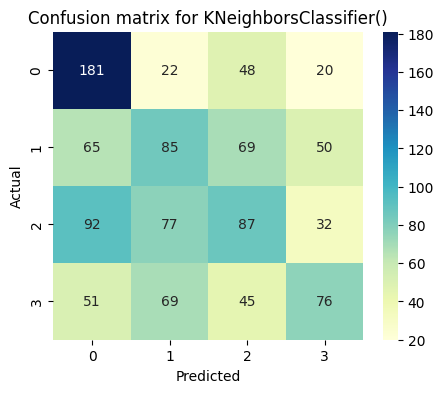

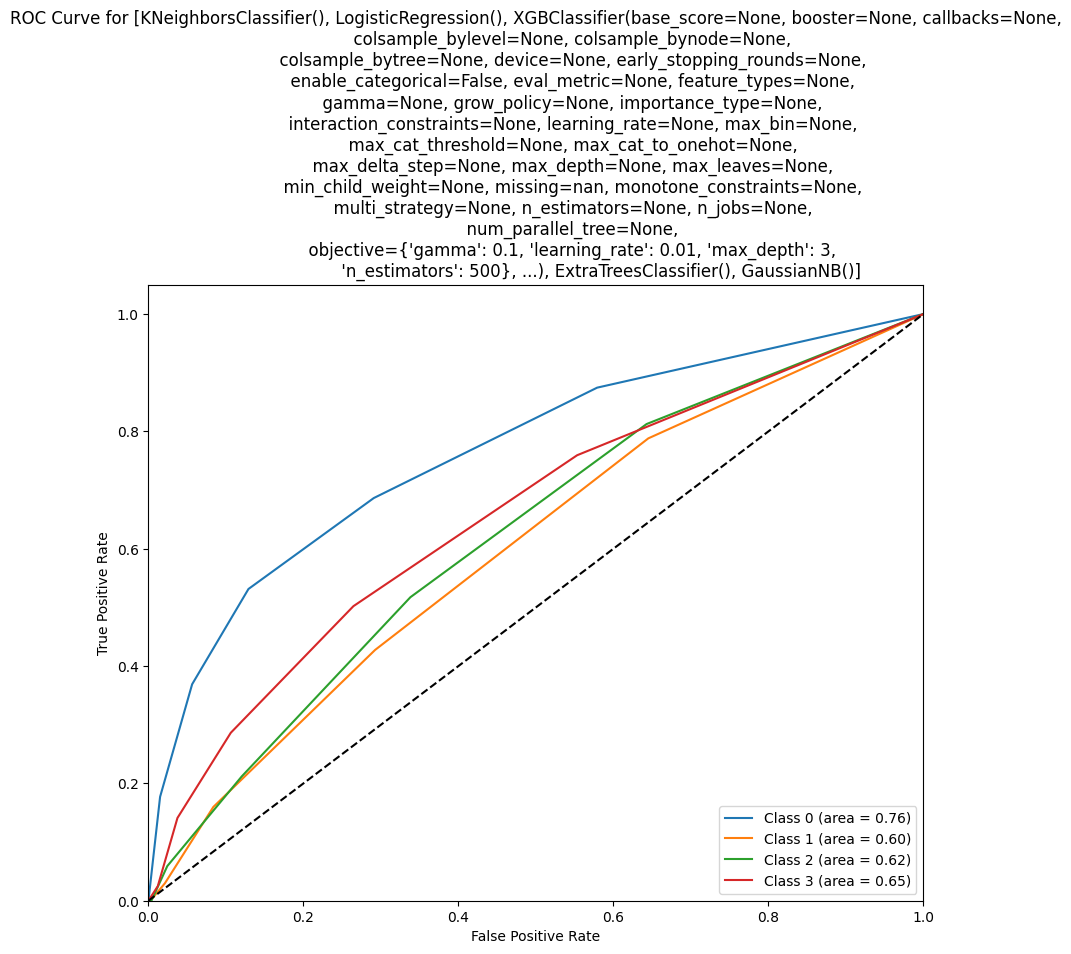

------------------------------ 

------------------------------ 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


model: LogisticRegression()
Accuracy_score: 0.46211412535079516
Precission_score: [0.57232704 0.38095238 0.40414508 0.43708609]
Recall_score: [0.67158672 0.08921933 0.54166667 0.54771784]
F1-score: [0.6179966  0.14457831 0.46290801 0.48618785]
AUC: 0.7097064463983848
Confusion matrix for LogisticRegression():


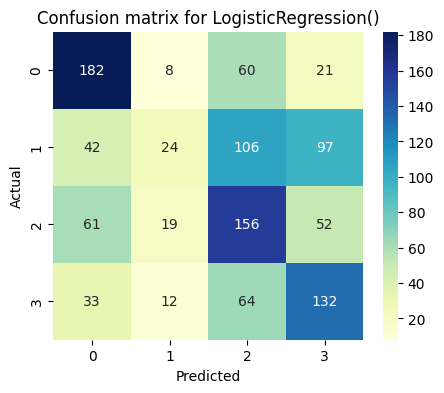

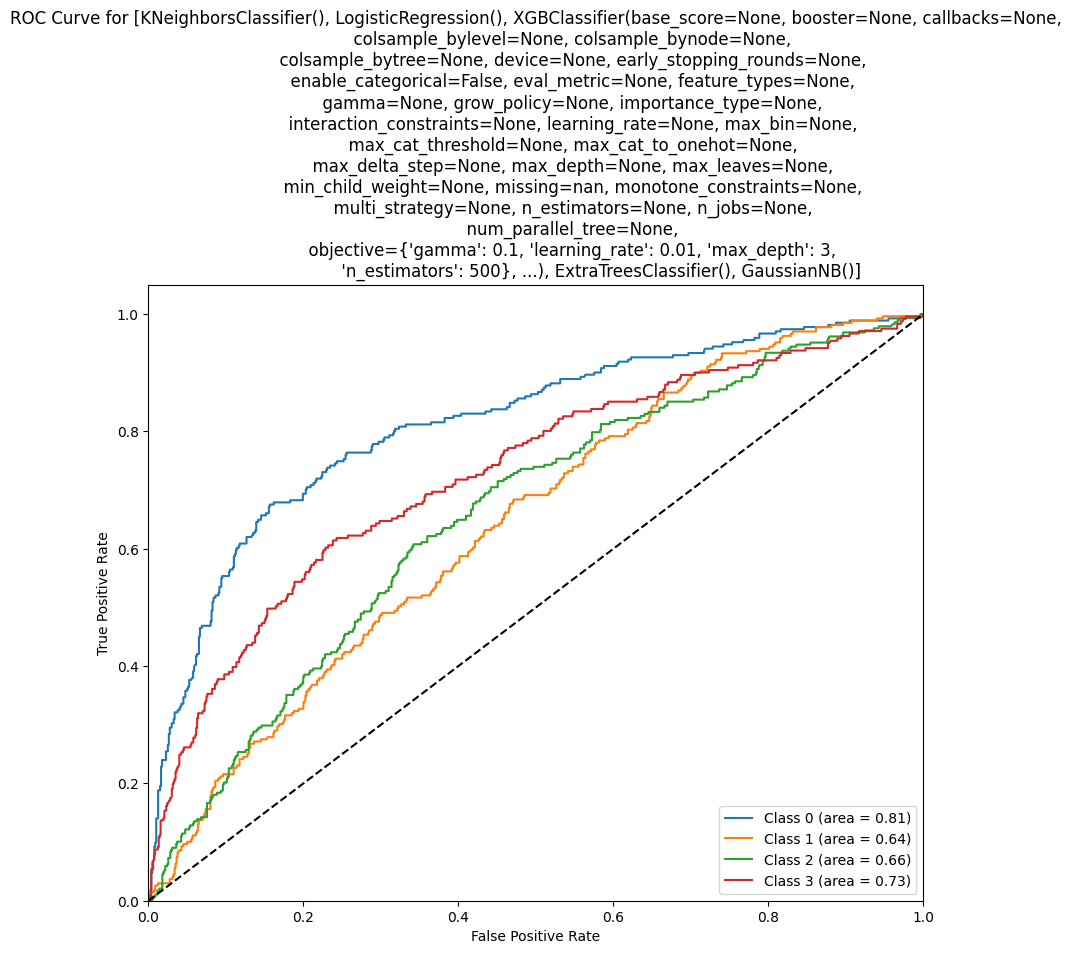

------------------------------ 

------------------------------ 

model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
Accuracy_score: 0.44340505144995324
Precission_score: [0.51764706 0.38505747 0.39473684 0.44223108]
Recall_score: [0.64944649 0.24907063 0.41666667 0.46058091]


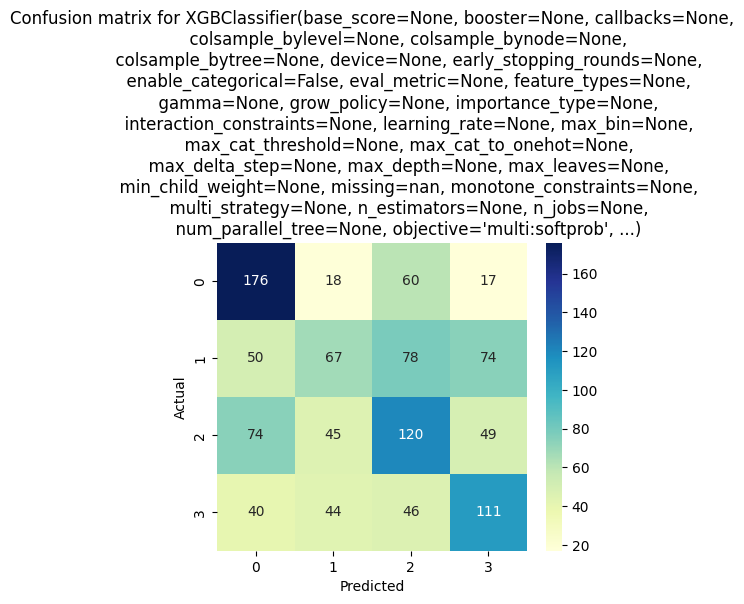

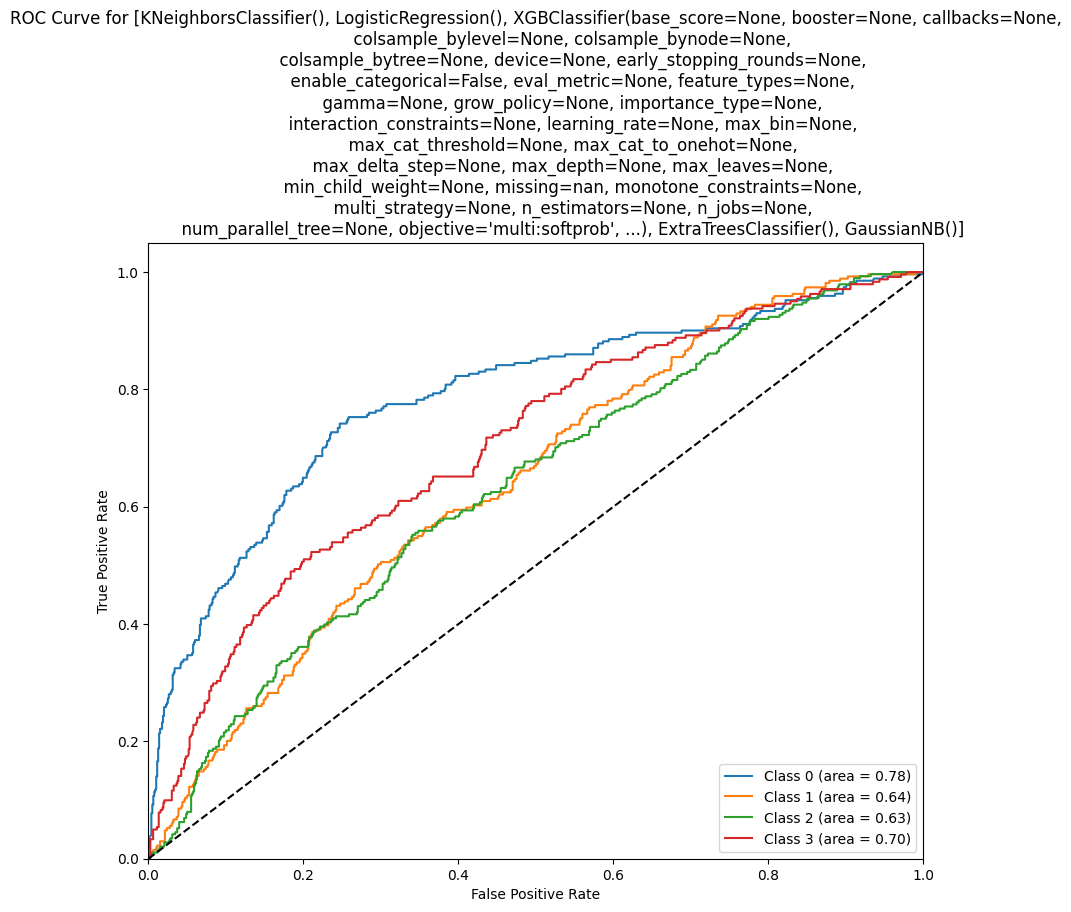

------------------------------ 

------------------------------ 

model: ExtraTreesClassifier()
Accuracy_score: 0.3882132834424696
Precission_score: [0.45609065 0.31950207 0.38589212 0.35897436]
Recall_score: [0.59409594 0.28624535 0.32291667 0.34854772]
F1-score: [0.51602564 0.30196078 0.35160681 0.35368421]
AUC: 0.6335315722483323
Confusion matrix for ExtraTreesClassifier():


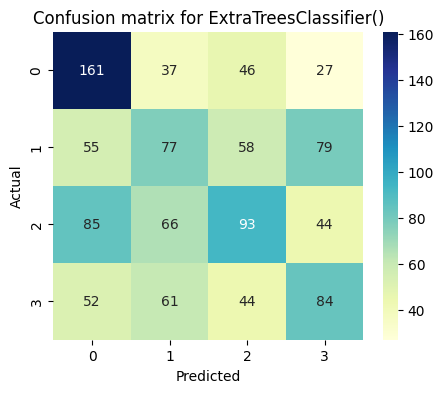

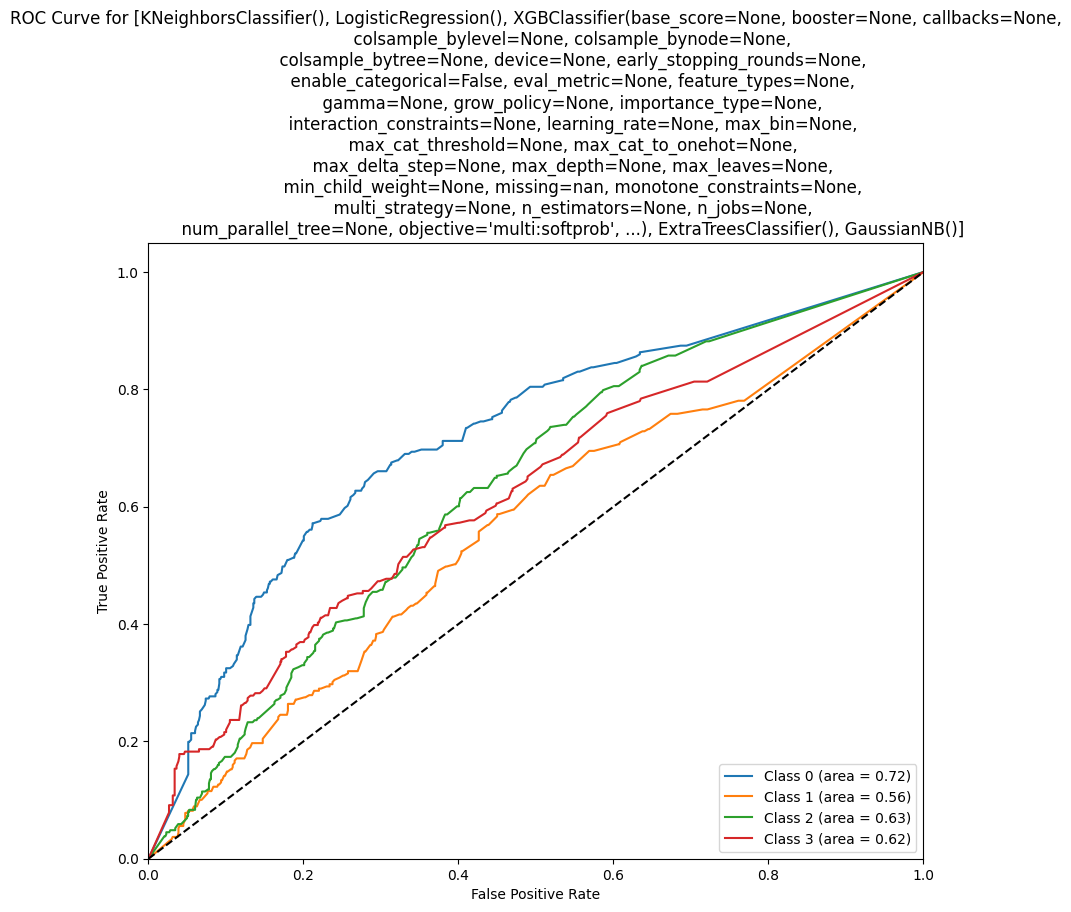

------------------------------ 

------------------------------ 

model: GaussianNB()
Accuracy_score: 0.39756782039289057
Precission_score: [0.54151625 0.3902439  0.35319149 0.33179724]
Recall_score: [0.55350554 0.17843866 0.28819444 0.59751037]
F1-score: [0.54744526 0.24489796 0.31739962 0.42666667]
AUC: 0.6604670914736156
Confusion matrix for GaussianNB():


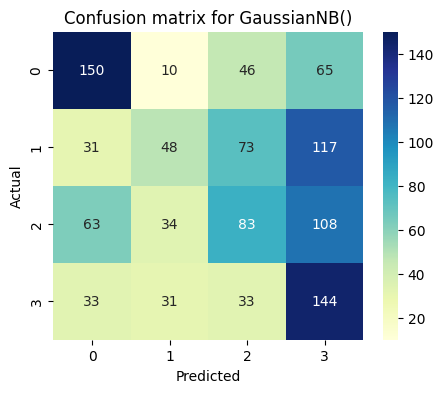

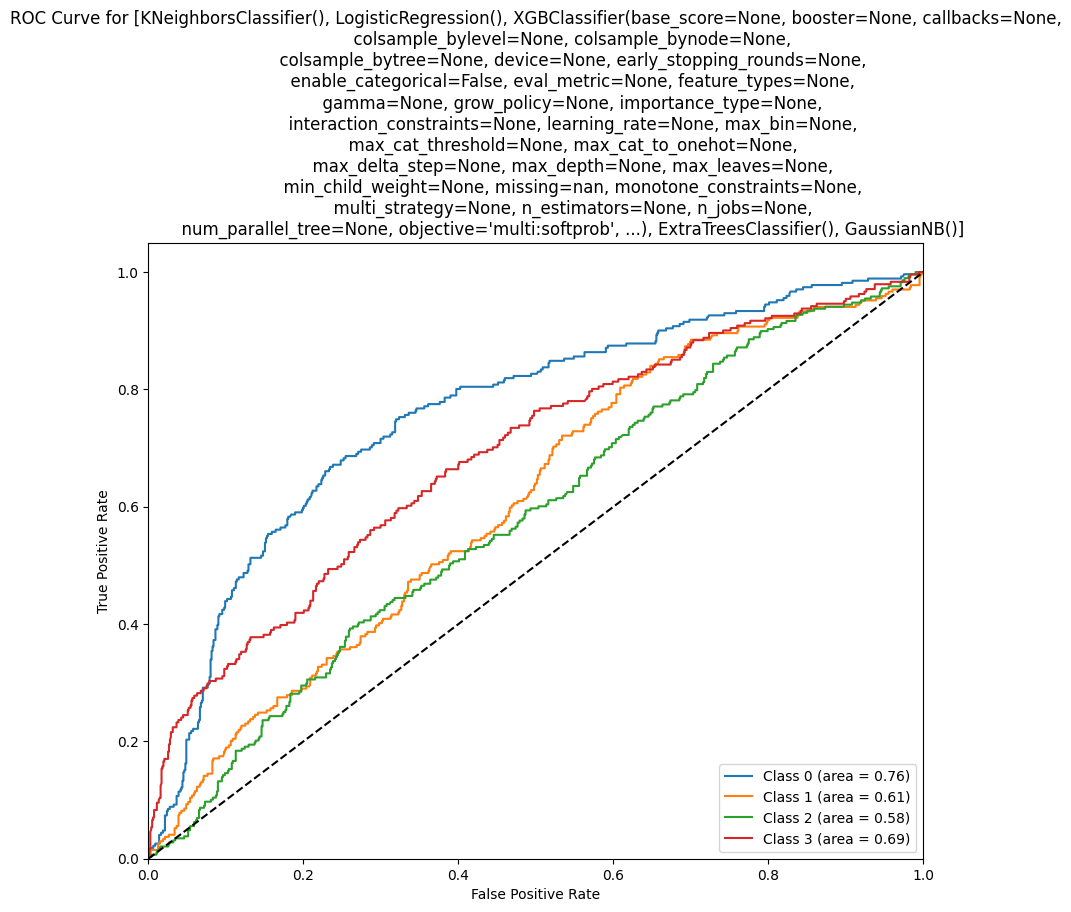

------------------------------ 

------------------------------ 



In [64]:
models = [KNeighborsClassifier(), LogisticRegression(), XGBClassifier({'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}), ExtraTreesClassifier(), GaussianNB()]
scores = dict()





num_classes = len(np.unique(y_train))
y_train_binarized = label_binarize(y_train, classes=np.arange(num_classes))
y_test_binarized = label_binarize(y_test, classes=np.arange(num_classes))




#############{'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    y_pred_proba = m.predict_proba(X_test)

    print(f'model: {str(m)}')
    print(f'Accuracy_score: {accuracy_score(y_test,y_pred)}')
    print(f'Precission_score: {precision_score(y_test,y_pred,average=None)}')
    print(f'Recall_score: {recall_score(y_test,y_pred,average=None)}')
    print(f'F1-score: {f1_score(y_test,y_pred,average=None)}')

    print(f'AUC: {roc_auc_score(y_test,y_pred_proba,multi_class="ovo")}')
    confusion_mat = confusion_matrix(y_test, y_pred)
    print(f'Confusion matrix for {str(m)}:')
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_mat, annot=True, cmap="YlGnBu", fmt="d", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f'Confusion matrix for {str(m)}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()













    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(4):
      fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curve
    plt.figure(figsize=(10, 8))
    for i in range(4):
      plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for ' + str(models))
    plt.legend(loc="lower right")
    plt.show()

    print('-'*30, '\n')























    print('-'*30, '\n')




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:727: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


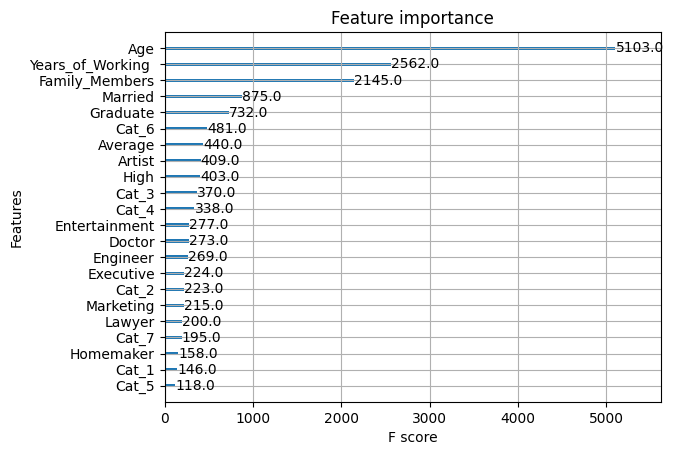

In [44]:
import xgboost as xgb
xgboost = XGBClassifier({'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500})
xgboost.fit(X_train, y_train)
xgb.plot_importance(xgboost)
plt.show()

Cross

In [ ]:
models = [KNeighborsClassifier(), LogisticRegression(), XGBClassifier(), ExtraTreesClassifier(), GaussianNB()]
model_names = ['KNeighborsClassifier', 'LogisticRegression', 'XGBClassifier', 'ExtraTreesClassifier', 'GaussianNB']
scores = dict()

for i, m in enumerate(models):
    cv_scores = cross_val_score(m, X_train, y_train, cv=5)
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'Model: {model_names[i]}')
    print(f'Cross-validation scores: {cv_scores}')
    print(f'Average cross-validation score: {cv_scores.mean()}')
    print(f'Accuracy_score: {accuracy_score(y_test, y_pred)}')
    print(f'Precision_score: {precision_score(y_test, y_pred, average=None)}')
    print(f'Recall_score: {recall_score(y_test, y_pred, average=None)}')
    print(f'F1-score: {f1_score(y_test, y_pred, average=None)}')

    print('-' * 30, '\n')

Model: KNeighborsClassifier
Cross-validation scores: [0.41989319 0.42790387 0.40748163 0.42752171 0.40547762]
Average cross-validation score: 0.41765560493483633


TypeError: got an unexpected keyword argument 'average'

# Neural Net old


In [ ]:

# testing the data values
print(Y_new.values )
Y_tmp=Y_new.values
print(Y_tmp[0:22])

[1. 3. 0. ... 2. 2. 0.]
[1. 3. 0. 3. 3. 2. 1. 0. 0. 0. 1. 2. 2. 2. 2. 1. 0. 1. 2. 2. 2. 3.]


In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
# Split dataset into training (75%) test (25%) set
X_train, X_test, y_train, y_test = train_test_split(X_new, Y_new, test_size=0.25, random_state=25)
#X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.15, random_state=25)
# Normalization of the data
X_train_n = (X_train-X_train.mean())/(X_train.max()-X_train.min())
X_test_n = (X_test-X_test.mean())/(X_test.max()-X_test.min())
#X_valid_n = (X_valid-X_valid.mean())/(X_valid.max()-X_valid.min())
print(X_train_n.shape)
print(y_train.shape)
#print(X_train_n)


# fix random seed for reproducibility


#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)
num_classes = 4
num_hidden_nodes = 400

(5615, 25)
(5615,)


In [ ]:
def baseline_model():
    # create model
    model = Sequential()

    model.add(Dense(25, input_dim=X_train_n.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(64, kernel_initializer='normal', activation='relu'))

    # Add batch normalization and dropout in layer 5
    model.add(Dense(64, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(64, kernel_initializer='normal', activation='relu'))

    # Add batch normalization and dropout in layer 7
    model.add(Dense(128, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dense(128, kernel_initializer='normal', activation='relu'))
    model.add(Dense(64, kernel_initializer='normal', activation='relu'))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    # Add batch normalization and dropout in layer 12
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))


    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

# build the model
model = baseline_model()


model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_215 (Dense)           (None, 25)                650       
                                                                 
 dense_216 (Dense)           (None, 64)                1664      
                                                                 
 dense_217 (Dense)           (None, 64)                4160      
                                                                 
 batch_normalization_41 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dropout_41 (Dropout)        (None, 64)                0         
                                                                 
 dense_218 (Dense)           (None, 64)                4160      
                                                     

Epoch 1/100
44/44 - 4s - loss: 1.3790 - accuracy: 0.2889 - val_loss: 1.3838 - val_accuracy: 0.2826 - 4s/epoch - 101ms/step
Epoch 2/100
44/44 - 0s - loss: 1.2951 - accuracy: 0.3606 - val_loss: 1.3799 - val_accuracy: 0.2826 - 413ms/epoch - 9ms/step
Epoch 3/100
44/44 - 0s - loss: 1.2446 - accuracy: 0.4068 - val_loss: 1.3812 - val_accuracy: 0.2826 - 427ms/epoch - 10ms/step
Epoch 4/100
44/44 - 0s - loss: 1.2235 - accuracy: 0.4249 - val_loss: 1.3819 - val_accuracy: 0.2826 - 431ms/epoch - 10ms/step
Epoch 5/100
44/44 - 0s - loss: 1.2183 - accuracy: 0.4310 - val_loss: 1.3913 - val_accuracy: 0.2826 - 416ms/epoch - 9ms/step
Epoch 6/100
44/44 - 0s - loss: 1.2164 - accuracy: 0.4419 - val_loss: 1.4044 - val_accuracy: 0.2826 - 425ms/epoch - 10ms/step
Epoch 7/100
44/44 - 0s - loss: 1.2124 - accuracy: 0.4410 - val_loss: 1.3937 - val_accuracy: 0.2826 - 433ms/epoch - 10ms/step
Epoch 8/100
44/44 - 0s - loss: 1.2122 - accuracy: 0.4484 - val_loss: 1.4286 - val_accuracy: 0.2826 - 405ms/epoch - 9ms/step
Epoch

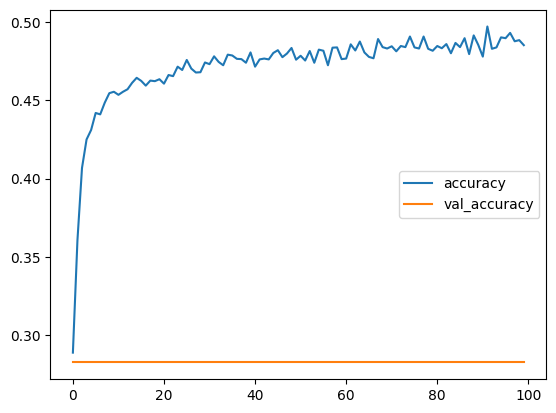

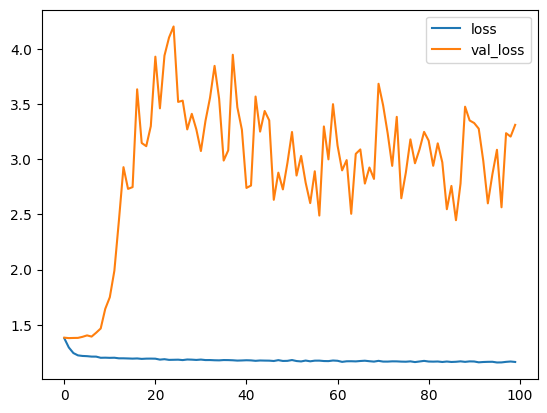

59/59 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

         0.0       0.47      0.83      0.60       529
         1.0       0.31      0.11      0.17       402
         2.0       0.37      0.32      0.34       498
         3.0       0.54      0.46      0.49       443

    accuracy                           0.45      1872
   macro avg       0.42      0.43      0.40      1872
weighted avg       0.43      0.45      0.41      1872



In [ ]:
# Fit the model
# verbose : number of steps before showing a result
history = model.fit(X_train, y_train, validation_data=(X_test_n, y_test), epochs=100, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
############

#######################
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
#
metrics = history.history
plt.plot(history.epoch, metrics['accuracy'], metrics['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()


y_pred_prob = model.predict(X_test)

# Convert the probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Print the classification report
print(classification_report(y_test, y_pred))

# Neural net new test1

In [26]:
pip install keras_sequential_ascii

  Preparing metadata (setup.py) ... done
  Created wheel for keras_sequential_ascii: filename=keras_sequential_ascii-0.1.1-py3-none-any.whl size=3042 sha256=30bb52eb93d061a8c918191a8f41f364fd3e9db799e4481e9aa43b8096307886
  Stored in directory: /root/.cache/pip/wheels/50/10/f3/5eeae758ef81ee4e16d618471561509355b0f2e5f38bf41185
Successfully built keras_sequential_ascii


In [71]:
num_classes = 4
num_hidden_nodes = 400

In [72]:
from keras import callbacks
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)


def baseline_model():
    # create model
    model = Sequential()

    model.add(Dense(25, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, kernel_initializer='normal', activation='relu'))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dense(50, kernel_initializer='normal', activation='relu'))
    # Add batch normalization and dropout in layer 12
    model.add(Dense(25, kernel_initializer='normal', activation='relu'))


    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

# build the model
model = baseline_model()


model.summary()


from keras_sequential_ascii import keras2ascii

keras2ascii(model)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 25)                575       
                                                                 
 dense_53 (Dense)            (None, 256)               6656      
                                                                 
 dense_54 (Dense)            (None, 256)               65792     
                                                                 
 batch_normalization_8 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_55 (Dense)            (None, 256)               65792     
                                                      

In [73]:
# Train the ANN
history = model.fit(X_train, y_train, epochs=25, batch_size=8, verbose=2,callbacks=[early_stopping], validation_split=0.2)

Epoch 1/25
749/749 - 22s - loss: 1.2832 - accuracy: 0.4159 - val_loss: 1.2527 - val_accuracy: 0.4272 - 22s/epoch - 29ms/step
Epoch 2/25
749/749 - 13s - loss: 1.2553 - accuracy: 0.4303 - val_loss: 1.2342 - val_accuracy: 0.4533 - 13s/epoch - 17ms/step
Epoch 3/25
749/749 - 20s - loss: 1.2512 - accuracy: 0.4371 - val_loss: 1.2182 - val_accuracy: 0.4559 - 20s/epoch - 27ms/step
Epoch 4/25
749/749 - 12s - loss: 1.2439 - accuracy: 0.4450 - val_loss: 1.2210 - val_accuracy: 0.4573 - 12s/epoch - 17ms/step
Epoch 5/25
749/749 - 12s - loss: 1.2425 - accuracy: 0.4451 - val_loss: 1.2250 - val_accuracy: 0.4559 - 12s/epoch - 16ms/step
Epoch 6/25
749/749 - 13s - loss: 1.2474 - accuracy: 0.4465 - val_loss: 1.2308 - val_accuracy: 0.4680 - 13s/epoch - 17ms/step
Epoch 7/25
749/749 - 13s - loss: 1.2437 - accuracy: 0.4395 - val_loss: 1.2511 - val_accuracy: 0.4085 - 13s/epoch - 17ms/step
Epoch 8/25
749/749 - 13s - loss: 1.2363 - accuracy: 0.4512 - val_loss: 1.3188 - val_accuracy: 0.4466 - 13s/epoch - 17ms/step


In [74]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 46.32%


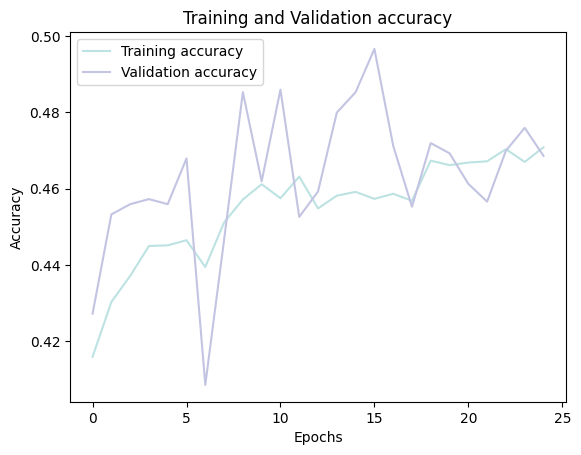

In [75]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

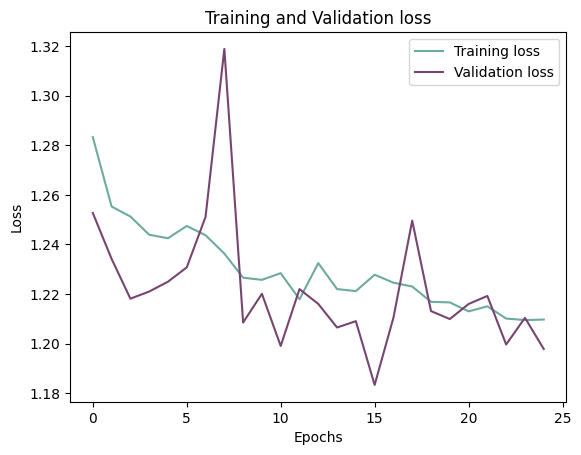

In [76]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#6daa9f", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#774571", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

In [ ]:
X_test

Married  Gender       Age  Graduate  Years_of_Working   Family_Members  \
0           0     0.0 -0.459171       1.0               13.0             2.0   
1           1     0.0 -0.039638       0.0                0.0             4.0   
2           0     0.0  0.559695       1.0                0.0             4.0   
3           0     1.0  0.439829       1.0                2.0             1.0   
4           1     1.0 -1.118438       1.0                0.0             5.0   
...       ...     ...       ...       ...                ...             ...   
1064        0     0.0 -0.339305       1.0                9.0             3.0   
1065        1     0.0  0.200095       0.0                0.0             2.0   
1066        0     1.0 -1.298238       0.0                0.0             5.0   
1067        1     0.0  1.518629       1.0                1.0             3.0   
1068        0     1.0 -0.519105       0.0                0.0             1.0   

      Artist  Doctor  Engineer  Entertainment  ...  Average  High  Low  Cat_1  \
0          0       1         0              0  ...        0     0    1      0   
1          0       0         0              0  ...        0     1    0      0   
2          0       0         1              0  ...        1     0    0      0   
3          0       0         0              0  ...        0     0    1      0   
4          0       0         0              0  ...        0     0    1      0   
...      ...     ...       ...            ...  ...      ...   ...  ...    ...   
1064       0       0         0              0  ...        0     0    1      0   
1065       0       0         0              1  ...        0     0    1      0   
1066       0       0         0              0  ...        0     0    1      0   
1067       0       0         0              1  ...        0     1    0      0   
1068       0       0         0              1  ...        0     0    1      0   

      Cat_2  Cat_3  Cat_4  Cat_5  Cat_6  Cat_7  
0         0      0      0      0      1      0  
1         0      0      0      0      1      0  
2         0      0      0      0      1      0  
3         0      0      0      0      1      0  
4         0      1      0      0      0      0  
...     ...    ...    ...    ...    ...    ...  
1064      0      0      0      0      1      0  
1065      0      0      0      0      1      0  
1066      0      0      0      0      1      0  
1067      0      0      0      0      1      0  
1068      0      0      0      0      1      0  

[1069 rows x 25 columns]

In [44]:
y_test = y_test.astype(np.float32)

In [45]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
np.set_printoptions(threshold=np.inf)
print(y_pred)

34/34 [==============================] - 0s 5ms/step
[2 2 3 2 0 0 2 3 2 0 0 1 2 2 2 3 0 2 0 1 1 2 2 0 0 2 2 3 3 0 0 3 2 3 3 0 0
 3 3 3 0 0 2 0 2 2 3 0 0 1 0 0 3 2 0 0 3 2 0 0 2 0 2 2 3 2 2 2 0 3 2 0 3 3
 2 3 3 2 0 0 3 2 2 0 2 0 2 3 2 2 0 3 2 0 0 2 2 3 3 2 0 2 1 1 0 0 0 0 2 3 2
 3 0 3 3 0 0 0 0 0 3 0 3 0 2 2 2 3 0 3 0 2 2 2 0 2 3 0 0 0 2 3 2 3 0 2 0 1
 0 2 0 0 3 2 0 2 0 0 1 0 0 2 3 0 3 0 2 0 2 0 0 2 0 3 2 2 3 2 0 2 2 3 2 3 0
 2 3 0 3 3 0 3 2 1 0 1 1 2 1 3 3 1 0 0 2 3 0 2 1 3 2 0 0 0 1 2 2 0 1 0 3 0
 2 2 0 2 2 0 0 0 2 0 3 3 1 2 0 0 0 0 3 3 2 0 1 2 0 3 3 0 0 3 0 2 2 2 0 2 1
 0 3 2 0 2 1 0 0 0 0 2 3 1 2 1 1 0 2 2 2 3 2 1 2 0 3 1 0 3 0 1 0 3 0 0 0 0
 2 2 0 0 2 0 1 0 2 2 3 0 2 1 2 0 0 2 3 0 2 3 2 0 0 0 0 2 0 3 2 0 1 2 0 0 2
 3 0 3 1 2 1 2 0 0 2 2 3 0 3 3 0 0 0 2 1 0 3 3 0 2 2 2 2 0 0 2 1 3 3 0 0 2
 3 0 2 0 0 2 0 0 3 2 3 0 0 0 0 0 2 0 0 2 0 2 0 3 2 3 1 2 2 3 2 0 2 0 3 2 0
 2 0 2 2 0 3 2 3 3 3 2 0 3 2 0 0 0 1 1 0 0 2 0 2 0 0 2 2 2 2 0 0 0 2 0 0 3
 1 1 2 0 0 3 0 3 0 3 0 0 2 0 2 3 0 0 2 3 2 2 0 

In [49]:
y_test = y_test.to_numpy()
y_test = y_test.astype(int)
y_test_list = y_test.tolist()
y_test_list

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [48]:
print(classification_report(y_test_list, y_pred,))

              precision    recall  f1-score   support

           0       0.51      0.76      0.61       271
           1       0.43      0.14      0.21       269
           2       0.41      0.50      0.45       288
           3       0.50      0.47      0.48       241

    accuracy                           0.47      1069
   macro avg       0.46      0.47      0.44      1069
weighted avg       0.46      0.47      0.44      1069



# Test


In [94]:
X_test

Married       Age  Graduate  Years_of_Working   Family_Members  Artist  \
0           1  0.098592       0.0           0.000000           0.500       0   
1           1  0.126761       0.0           0.071429           0.250       0   
2           0  0.661972       1.0           0.071429           0.125       0   
3           1  0.408451       1.0           0.214286           0.250       0   
4           0  0.183099       0.0           0.071429           0.500       0   
...       ...       ...       ...                ...             ...     ...   
2134        1  0.000000       0.0           0.071429           0.375       0   
2135        0  0.098592       0.0           0.000000           0.375       0   
2136        0  0.042254       0.0           0.571429           0.750       0   
2137        0  0.056338       0.0           0.071429           0.500       0   
2138        0  0.309859       0.0           0.071429           0.000       1   

      Doctor  Engineer  Entertainment  Executive  ...  Marketing  Average  \
0          0         0              0          0  ...          0        0   
1          0         0              0          0  ...          0        0   
2          0         0              0          0  ...          0        0   
3          0         0              0          1  ...          0        0   
4          1         0              0          0  ...          0        0   
...      ...       ...            ...        ...  ...        ...      ...   
2134       0         0              0          0  ...          0        0   
2135       0         0              0          0  ...          0        0   
2136       0         0              0          0  ...          0        0   
2137       1         0              0          0  ...          0        0   
2138       0         0              0          0  ...          0        0   

      High  Cat_1  Cat_2  Cat_3  Cat_4  Cat_5  Cat_6  Cat_7  
0        0      0      0      0      0      0      1      0  
1        0      0      0      0      0      0      1      0  
2        0      0      0      1      0      0      0      0  
3        1      0      0      0      0      0      1      0  
4        0      0      0      1      0      0      0      0  
...    ...    ...    ...    ...    ...    ...    ...    ...  
2134     0      0      0      0      0      0      1      0  
2135     0      0      1      0      0      0      0      0  
2136     0      0      1      0      0      0      0      0  
2137     0      0      0      0      0      0      1      0  
2138     0      0      0      0      0      0      1      0  

[2139 rows x 22 columns]

In [83]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
np.set_printoptions(threshold=np.inf)
print(y_pred)

67/67 [==============================] - 1s 8ms/step
[0 0 2 3 0 0 2 1 2 3 0 1 0 0 3 0 3 3 2 0 1 0 3 1 2 1 0 0 0 0 0 3 0 3 0 3 0
 0 0 1 1 1 0 2 1 0 2 0 2 2 3 3 0 3 0 0 0 1 1 1 3 0 2 1 2 0 3 2 1 2 1 3 3 0
 3 0 3 3 0 0 2 2 2 0 3 2 1 2 2 2 3 2 0 2 0 2 0 1 3 0 2 1 1 0 0 0 2 3 2 0 0
 0 0 3 0 2 3 3 2 2 1 0 3 2 3 1 3 2 1 2 3 1 3 1 0 2 3 2 3 0 3 3 1 1 1 1 2 3
 0 3 3 1 2 2 3 0 0 0 3 0 0 3 3 2 1 0 3 0 2 0 3 2 0 2 3 1 2 2 2 2 1 1 1 2 0
 0 2 0 2 2 2 0 2 0 3 2 3 3 1 0 3 1 1 3 1 3 2 0 1 2 0 3 2 2 1 0 3 2 3 2 3 3
 0 0 2 0 2 0 0 2 0 0 1 2 2 3 3 0 2 2 2 2 3 0 1 2 2 3 1 1 3 3 3 0 3 1 1 3 2
 0 0 0 1 2 0 2 3 1 0 2 1 0 1 0 3 1 3 3 1 3 0 3 3 0 3 3 3 2 1 0 0 0 0 1 2 1
 1 1 0 0 2 2 2 0 2 0 1 3 2 0 0 0 1 1 3 3 0 3 3 2 3 0 1 1 0 2 1 3 1 1 2 1 2
 0 1 0 3 0 1 0 1 1 0 0 1 0 2 0 0 2 2 1 2 0 0 3 3 0 1 2 2 0 3 0 2 3 0 3 0 0
 2 1 0 3 1 3 1 0 3 2 0 3 0 0 2 3 3 2 0 1 0 2 1 0 2 0 2 3 3 0 2 0 2 0 0 0 0
 0 3 1 3 2 3 2 1 2 3 3 3 3 3 3 2 0 0 3 2 0 0 3 1 3 3 3 0 3 2 3 2 0 3 0 0 0
 0 3 0 3 2 3 1 1 2 0 3 0 3 0 3 0 1 3 0 2 1 2 2 

In [84]:
print(y_pred)

[0 0 2 3 0 0 2 1 2 3 0 1 0 0 3 0 3 3 2 0 1 0 3 1 2 1 0 0 0 0 0 3 0 3 0 3 0
 0 0 1 1 1 0 2 1 0 2 0 2 2 3 3 0 3 0 0 0 1 1 1 3 0 2 1 2 0 3 2 1 2 1 3 3 0
 3 0 3 3 0 0 2 2 2 0 3 2 1 2 2 2 3 2 0 2 0 2 0 1 3 0 2 1 1 0 0 0 2 3 2 0 0
 0 0 3 0 2 3 3 2 2 1 0 3 2 3 1 3 2 1 2 3 1 3 1 0 2 3 2 3 0 3 3 1 1 1 1 2 3
 0 3 3 1 2 2 3 0 0 0 3 0 0 3 3 2 1 0 3 0 2 0 3 2 0 2 3 1 2 2 2 2 1 1 1 2 0
 0 2 0 2 2 2 0 2 0 3 2 3 3 1 0 3 1 1 3 1 3 2 0 1 2 0 3 2 2 1 0 3 2 3 2 3 3
 0 0 2 0 2 0 0 2 0 0 1 2 2 3 3 0 2 2 2 2 3 0 1 2 2 3 1 1 3 3 3 0 3 1 1 3 2
 0 0 0 1 2 0 2 3 1 0 2 1 0 1 0 3 1 3 3 1 3 0 3 3 0 3 3 3 2 1 0 0 0 0 1 2 1
 1 1 0 0 2 2 2 0 2 0 1 3 2 0 0 0 1 1 3 3 0 3 3 2 3 0 1 1 0 2 1 3 1 1 2 1 2
 0 1 0 3 0 1 0 1 1 0 0 1 0 2 0 0 2 2 1 2 0 0 3 3 0 1 2 2 0 3 0 2 3 0 3 0 0
 2 1 0 3 1 3 1 0 3 2 0 3 0 0 2 3 3 2 0 1 0 2 1 0 2 0 2 3 3 0 2 0 2 0 0 0 0
 0 3 1 3 2 3 2 1 2 3 3 3 3 3 3 2 0 0 3 2 0 0 3 1 3 3 3 0 3 2 3 2 0 3 0 0 0
 0 3 0 3 2 3 1 1 2 0 3 0 3 0 3 0 1 3 0 2 1 2 2 0 3 0 2 1 2 2 3 0 3 3 0 3 3
 0 2 1 0 0 3 0 3 3 2 0 2 

In [91]:

predictions = y_pred  # Replace this with your actual predictions
print(predictions)
# Map the numerical predictions to corresponding letters
prediction_mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}
mapped_predictions = [prediction_mapping[pred] for pred in predictions]
print(mapped_predictions)

# Load the 'Test.csv' file
test_df = pd.read_csv('/content/drive/MyDrive/dataset - test1/Test.csv')

# Fill the 'Class (Target)' column with the mapped predictions
test_df['Class(Target)'] = mapped_predictions
print(test_df)

# Save the updated dataframe back to 'Test.csv'
test_df.to_csv('Test.csv', index=False)

[0 0 2 3 0 0 2 1 2 3 0 1 0 0 3 0 3 3 2 0 1 0 3 1 2 1 0 0 0 0 0 3 0 3 0 3 0
 0 0 1 1 1 0 2 1 0 2 0 2 2 3 3 0 3 0 0 0 1 1 1 3 0 2 1 2 0 3 2 1 2 1 3 3 0
 3 0 3 3 0 0 2 2 2 0 3 2 1 2 2 2 3 2 0 2 0 2 0 1 3 0 2 1 1 0 0 0 2 3 2 0 0
 0 0 3 0 2 3 3 2 2 1 0 3 2 3 1 3 2 1 2 3 1 3 1 0 2 3 2 3 0 3 3 1 1 1 1 2 3
 0 3 3 1 2 2 3 0 0 0 3 0 0 3 3 2 1 0 3 0 2 0 3 2 0 2 3 1 2 2 2 2 1 1 1 2 0
 0 2 0 2 2 2 0 2 0 3 2 3 3 1 0 3 1 1 3 1 3 2 0 1 2 0 3 2 2 1 0 3 2 3 2 3 3
 0 0 2 0 2 0 0 2 0 0 1 2 2 3 3 0 2 2 2 2 3 0 1 2 2 3 1 1 3 3 3 0 3 1 1 3 2
 0 0 0 1 2 0 2 3 1 0 2 1 0 1 0 3 1 3 3 1 3 0 3 3 0 3 3 3 2 1 0 0 0 0 1 2 1
 1 1 0 0 2 2 2 0 2 0 1 3 2 0 0 0 1 1 3 3 0 3 3 2 3 0 1 1 0 2 1 3 1 1 2 1 2
 0 1 0 3 0 1 0 1 1 0 0 1 0 2 0 0 2 2 1 2 0 0 3 3 0 1 2 2 0 3 0 2 3 0 3 0 0
 2 1 0 3 1 3 1 0 3 2 0 3 0 0 2 3 3 2 0 1 0 2 1 0 2 0 2 3 3 0 2 0 2 0 0 0 0
 0 3 1 3 2 3 2 1 2 3 3 3 3 3 3 2 0 0 3 2 0 0 3 1 3 3 3 0 3 2 3 2 0 3 0 0 0
 0 3 0 3 2 3 1 1 2 0 3 0 3 0 3 0 1 3 0 2 1 2 2 0 3 0 2 1 2 2 3 0 3 3 0 3 3
 0 2 1 0 0 3 0 3 3 2 0 2 

In [93]:
dftestfinal =pd.read_csv('/content/drive/MyDrive/dataset - test1/Test.csv')
dftestfinal

ID  Married  Gender  Age  Graduate  Profession  Years_of_Working   \
0      8556        1     1.0   25       0.0  Healthcare                0.0   
1      8557        1     1.0   27       0.0  Healthcare                1.0   
2      8558        0     0.0   65       1.0      Lawyer                1.0   
3      8559        1     0.0   47       1.0   Executive                3.0   
4      8560        0     1.0   31       0.0      Doctor                1.0   
...     ...      ...     ...  ...       ...         ...                ...   
2134  10690        1     1.0   18       0.0  Healthcare                1.0   
2135  10691        0     1.0   25       0.0  Healthcare                0.0   
2136  10692        0     1.0   21       0.0  Healthcare                8.0   
2137  10693        0     1.0   22       0.0      Doctor                1.0   
2138  10694        0     0.0   40       0.0      Artist                1.0   

     Spending_Score  Family_Members Category  Class(Target)  
0               Low             5.0    Cat_6            NaN  
1               Low             3.0      NaN            NaN  
2               Low             2.0    Cat_3            NaN  
3              High             3.0    Cat_6            NaN  
4               Low             5.0    Cat_3            NaN  
...             ...             ...      ...            ...  
2134            Low             4.0    Cat_6            NaN  
2135            Low             4.0    Cat_2            NaN  
2136            Low             7.0    Cat_2            NaN  
2137            Low             5.0    Cat_6            NaN  
2138            Low             1.0    Cat_6            NaN  

[2139 rows x 11 columns]